# Анализ данных и выявление взаимосвязей

Краудфандинговая платформа kiva.org ставит своей целью предоставление финансовых услуг наиболее нуждающимся и необеспеченным людям. Заёмщики оставляют заявку на сайте, доноры поддерживают её  финансово, на месте партнёр организации выдаёт кредит, который погашается из этих средств, которые донорам возвращаются уже заёмщиками через платформу.

 **Цель исследования** - провести анализ представленных данных и найти взаимосвязи характеристик со скоростью набора средств.
 
 **Задачи исследования:**
- предобработка данных;
- анализ скорости сбора средств;
- анализ заявок;
- оценить распределение женщин-заемщиков в разных странах и религиях;
- анализ количества партнёров Kiva в разных странах.

**ИСХОДНЫЕ ДАННЫЕ**

Представленный компанией датасет за 2014-2017гг. содержит информацию о займах на различные проекты в 85 разных странах.

- id - идентификатор займа
- funded_amount - собранные средства
- loan_amount - запрашиваемые средства 
- activity - вид деятельности, для чего берется займ
- sector - сектор, на что займ
- use - как именно будет потрачен займ
- country_code - код страны
- country - страна
- region - регион
- currency - валюта 
- partner_id - идентификатор партнера, выдавшего займ
- posted_time - дата-время размещения заявки
- disbursed_time - дата-время выдачи займа
- funded_time - дата-время завершения сбора средств
- term_in_months - количество месяцев, за которые нуджно вернуть займ
- lender_count - количетсво заемщиков
- tags - теги
- borrower_genders - пол заемщиков
- repayment_interval - регулярность погашения займа
- date - дата размещения заявки    
- main_country_religion - основная религия страны

<a id='section0'></a>

### Декомпозиция

[1. Изучение общей информации и предобработка данных](#section1)
* [1.1. Загрузка данных](#section1)
* [1.2. Очистка данных](#section12)
* [1.3. Подготовка данных](#section13)

[2. Анализ скорости сбора средств](#section2)
* [2.1. Время, затраченное на сбор средств по каждой заявке](#section2)
* [2.2. Распределение времени сбора средств](#section22)
* [2.3. Факторы, которые могут повлиять на скорость сбора средств](#section23)
  * [Сумма кредита](#section231)
  * [Секторы](#section232)
  * [Деятельность](#section233)
  * [Партнер](#section234)
  * [Страна](#section235)
  
[3. Анализ заявок в зависимости от индекса бедности страны](#section3)
* [3.1. Аггрегация данных по заявкам в разрезе стран](#section3)
* [3.2. Анализ взаимосвязи между темой заявки (sector) и индексом бедности страны](#section32)
* [3.3. Частота выдачи кредитов по странам](#section33)

[4. Распределение женщин-заемщиков в разных странах и религиях](#section4)

[5. Партнёрские отношения Kiva в регионах](#section5)

[6. Вывод](#section6)

<a id='section1'></a>

## 1. Изучение общей информации и предобработка данных

### 1.1. Загрузка данных

[К содержанию](#section0)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from plotly import graph_objects as go

In [2]:
# сводный индекс бедности
mpi_index = {
 'Afghanistan':0.27172124, 'Albania':0.00274788, 'Algeria':0.0054091, 'Angola':0.28243506, 'Argentina':0.0014693, 
 'Armenia':0.000690069007857107, 'Azerbaijan':0.021,'Bangladesh':0.1040603, 'Belize':0.01710883, 'Benin':0.36767483, 
 'Bolivia':0.0377543, 'Botswana':0.0726387, 'Burundi':0.408861094240289, 
 'Cameroon':0.2320601, 'Central African Republic':0.4613475, 'Chad':0.5170112, 'Chile':0.207, 'Colombia':0.01965727, 
 'Congo':0.3311887, 'Costa Rica':0.0020063, 'Cote D\'Ivoire':0.235871, 
 'Cuba':0.0026887, 'Dominican Republic':0.0087862, 'Ecuador':0.0079374, 'Ethiopia':0.3666042, 'Gambia':0.1980231, 
 'Georgia':0.0012446, 'Ghana':0.1112183, 'Guinea':0.3732216, 'Guinea-Bissau':0.3406887, 'Guyana':0.0065924, 
 'Haiti':0.1995877, 'Honduras':0.0511542, 'India':0.0688106, 'Indonesia':0.0140107, 'Iraq':0.03269432, 
 'Israel':None,'Jamaica':0.0108103, 'Jordan':0.00152592, 'Kiribati':0.0801574, 'Kyrgyzstan':0.001426, 
 'Lao People\'s Democratic Republic':0.10833325, 'Lebanon':0.531,'Lesotho':0.0843592, 'Liberia':0.2592937, 'Madagascar':0.3839745, 
 'Malawi':0.2310952, 'Maldives':0.00265409, 'Mali':0.3760629, 'Mauritania':0.3270372, 'Mexico':0.0280538, 
 'Mongolia':0.0281268, 'Montenegro':0.0048989, 'Morocco':0.0266967, 'Myanmar (Burma)':0.17584623, 'Nepal':0.0743989, 
 'Nigeria':0.2543896, 'North Macedonia':0.0014221, 'Pakistan':0.1982474, 'Palestine':0.0019801, 'Panama':0.191,
 'Papua New Guinea':0.2632909, 'Paraguay':0.01884858, 'Peru':0.0292211, 'Philippines':0.02424934, 'Rwanda':0.231002, 
 'Samoa':0.0246005, 'Sao Tome and Principe':0.0479234, 'Senegal':0.262862, 'Serbia':0.0004331, 'Seychelles':0.0029635, 
 'Sierra Leone':0.2928993, 'Somalia':0.514,'South Africa':0.02489064, 'Sri Lanka':0.0111847, 'Suriname':0.0112325, 
 'Tajikistan':0.02900592, 'Tanzania':0.284179310669258, 'Thailand':0.0021207, 'Timor-Leste':0.221514240070676,
 'Togo':0.1796163, 'Tonga':0.0033362, 'Tunisia':0.0028877, 'Turkmenistan':0.0008492, 'Turkey':0.028,
 'Tuvalu':0.0080846, 'Uganda':0.281028478426768, 'Vietnam':0.0077294, 'Zambia':0.2316851, 'Zimbabwe':0.1099418, 
 'Barbados':0.00852886, 'Bhutan':0.17486399, 'Bosnia and Herzegovina':0.0083075, 'Brazil':0.01634604, 
 'Burkina Faso':0.523424279357662, 'Cambodia':0.17034812, 'China':0.0160667, 'Comoros':0.18077141, 
 'The Democratic Republic of the Congo':0.1116763, 
 'Egypt':0.0196817970481763, 'El Salvador':0.03246251, 'Eswatini (Kingdom of)':0.08127132, 'Gabon':0.0696953622816103, 
 'Guatemala':0.13351782, 'Kazakhstan':0.00161063266199911, 'Kenya':0.170776074964141, 'Libya':0.00742146512493491, 
 'Moldova':0.00353391, 'Mozambique':0.416955412151251, 'Namibia':0.184734534885262, 
 'Nicaragua':0.0744948916698962, 'Niger':0.601279812220296, 'Saint Lucia':0.00720186, 'South Sudan':0.58015746, 
 'Sudan':0.2794396, 'Trinidad and Tobago':0.00241792, 'Vanuatu':0.129,'Ukraine':0.000840431758839254, 
 'Yemen':0.245166461457986 }

def lookup(df:pd.DataFrame) -> None:
    '''Функция для получения базовой информации о датафрейме'''
    print('Dataset shape',df.shape,"example:")
    display(df.dropna().sample().T)
    for col in df.columns:
        n = df[col].nunique()
        if n < 15:
            display(df[col].value_counts(dropna=False).to_frame().T.style.format("{:_.0f}"))
        elif np.issubdtype(df[col].dtype, np.number):
            print(f"{col} — {n} values. Min {df[col].min():_.0f}, avg: {df[col].mean():_.1f}, max: {df[col].max():_.0f}")
        else:
            print(f"{col} — {n} values. Min {df[col].dropna().min()}, max: {df[col].dropna().max()}")

In [3]:
df = pd.read_csv('kiva.csv',low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622633 entries, 0 to 622632
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     622633 non-null  int64  
 1   funded_amount          622633 non-null  float64
 2   loan_amount            622633 non-null  float64
 3   activity               622633 non-null  object 
 4   sector                 622633 non-null  object 
 5   use                    619310 non-null  object 
 6   country_code           622625 non-null  object 
 7   country                622633 non-null  object 
 8   region                 574127 non-null  object 
 9   currency               622633 non-null  object 
 10  partner_id             611522 non-null  float64
 11  posted_time            622633 non-null  object 
 12  disbursed_time         622633 non-null  object 
 13  funded_time            622633 non-null  object 
 14  term_in_months         622633 non-nu

In [5]:
# исследуем датасет
lookup(df)

Dataset shape (622633, 21) example:


204712
id                                                                864139
funded_amount                                                      600.0
loan_amount                                                        600.0
activity                                                   General Store
sector                                                            Retail
use                    to purchase more groceries to sell such as can...
country_code                                                          PH
country                                                      Philippines
region                                                     Kalibo, Aklan
currency                                                             PHP
partner_id                                                         145.0
posted_time                                    2015-03-31 02:10:04+00:00
disbursed_time                                 2015-03-12 07:00:00+00:00
funded_time                                    2015-04-13 13:12:00+00:00
term_in_months                                                       8.0
lender_count                                                          21
tags                         #Parent, #Woman Owned Biz, #Repeat Borrower
borrower_genders                                                  female
repayment_interval                                             irregular
date                                                          2015-03-31
main_country_religion                                         Christians

id — 622633 values. Min 653_047, avg: 990_100.5, max: 1_340_316
funded_amount — 475 values. Min 25, avg: 798.3, max: 100_000
loan_amount — 475 values. Min 25, avg: 798.3, max: 100_000
activity — 163 values. Min Adult Care, max: Wholesale
sector — 15 values. Min Agriculture, max: Wholesale
use — 391213 values. MiTo buy chicken., max: ” provide a safer and more secure living environment for his family by allowing him to purchase new windows for his home through an affordable loan.
country_code — 84 values. Min AF, max: ZW
country — 85 values. Min Afghanistan, max: Zimbabwe
region — 12359 values. Min "The first May" village, max: İZMİT
currency — 67 values. Min ALL, max: ZWD
partner_id — 363 values. Min 9, avg: 178.5, max: 535
posted_time — 619611 values. Min 2014-01-01 04:49:26+00:00, max: 2017-07-25 06:14:08+00:00
disbursed_time — 5698 values. Min 2013-12-02 08:00:00+00:00, max: 2017-09-28 07:00:00+00:00
funded_time — 497853 values. Min 2014-01-01 12:18:55+00:00, max: 2017-07-26 02:09:4

date — 1296 values. Min 2014-01-01, max: 2017-07-25


<a id='section12'></a>

### 1.2. Очистка данных

[К содержанию](#section0)

In [6]:
display(df[df['country_code'].isna()==True])

id  funded_amount  loan_amount                   activity  \
191118   851360         4150.0       4150.0                  Wholesale   
191379   851368         4150.0       4150.0                  Wholesale   
321897   991853         3325.0       3325.0                  Wholesale   
327947   998555         3325.0       3325.0                  Wholesale   
394618  1068167         3325.0       3325.0                  Wholesale   
394830  1068159         4000.0       4000.0                  Wholesale   
454439  1147852         5100.0       5100.0  Renewable Energy Products   
454867  1147866         5000.0       5000.0                  Wholesale   

           sector                                                use  \
191118  Wholesale  To purchase lighting products for sale to loca...   
191379  Wholesale  To purchase lighting products for sale to loca...   
321897  Wholesale  To purchase lighting products for sale to loca...   
327947  Wholesale  To purchase lighting products for sale to loca...   
394618  Wholesale  To purchase lighting products for sale to loca...   
394830  Wholesale  purchase solar lighting products for sale to l...   
454439     Retail  to pay for stock of solar lights and cell phon...   
454867  Wholesale  to maintain a stock of solar lights and cell p...   

       country_code  country         region currency  ...  \
191118          NaN  Namibia        EEnhana      NAD  ...   
191379          NaN  Namibia          Rundu      NAD  ...   
321897          NaN  Namibia        EEnhana      NAD  ...   
327947          NaN  Namibia          Rundu      NAD  ...   
394618          NaN  Namibia        EEnhana      NAD  ...   
394830          NaN  Namibia          Rundu      NAD  ...   
454439          NaN  Namibia  Katima Mulilo      NAD  ...   
454867          NaN  Namibia       Oshakati      NAD  ...   

                      posted_time             disbursed_time  \
191118  2015-03-05 20:23:50+00:00  2015-06-03 07:00:00+00:00   
191379  2015-03-05 20:56:01+00:00  2015-06-03 07:00:00+00:00   
321897  2015-12-08 19:08:18+00:00  2016-01-05 08:00:00+00:00   
327947  2015-12-21 19:59:37+00:00  2016-01-05 08:00:00+00:00   
394618  2016-05-12 21:33:33+00:00  2016-06-10 07:00:00+00:00   
394830  2016-05-12 21:19:41+00:00  2016-06-10 07:00:00+00:00   
454439  2016-09-08 22:12:16+00:00  2016-10-01 07:00:00+00:00   
454867  2016-09-08 22:30:43+00:00  2016-10-01 07:00:00+00:00   

                      funded_time term_in_months  lender_count  \
191118  2015-03-25 15:10:03+00:00            6.0           162   
191379  2015-03-25 15:48:31+00:00            6.0           159   
321897  2015-12-22 03:53:32+00:00            7.0           120   
327947  2015-12-22 05:58:09+00:00            7.0           126   
394618  2016-05-15 20:27:57+00:00            7.0           118   
394830  2016-05-15 17:36:49+00:00            7.0           150   
454439  2016-10-03 21:56:37+00:00            7.0           183   
454867  2016-09-19 06:32:16+00:00            7.0           183   

                                                     tags borrower_genders  \
191118                       user_favorite, user_favorite           female   
191379                                      user_favorite             male   
321897                                      user_favorite           female   
327947                                                NaN             male   
394618  #Repeat Borrower, user_favorite, user_favorite...           female   
394830  #Eco-friendly, #Repeat Borrower, #Technology, ...             male   
454439  #Eco-friendly, #Technology, user_favorite, use...             male   
454867  #Eco-friendly, #Technology, user_favorite, use...           female   

       repayment_interval        date main_country_religion  
191118             bullet  2015-03-05            Christians  
191379             bullet  2015-03-05            Christians  
321897             bullet  2015-12-08            Christians  
327947             bulle

In [7]:
df['country_code'] = df['country_code'].fillna('NA')
df['partner_id'] = df['partner_id'].fillna(999)
df['region'] = df['region'].fillna('не указан')
df['borrower_genders'] = df['borrower_genders'].fillna('не указан')

In [8]:
df['term_in_months'] = df['term_in_months'].astype('int')
df['partner_id'] = df['partner_id'].astype('int')
df['posted_time'] = df.apply(lambda x:x['posted_time'].replace('+00:00',''), axis=1)
df['disbursed_time'] = df.apply(lambda x:x['disbursed_time'].replace('+00:00',''), axis=1)
df['funded_time'] = df.apply(lambda x:x['funded_time'].replace('+00:00',''), axis=1)
df[['posted_time', 'disbursed_time', 'funded_time', 'date']] = df[['posted_time', 'disbursed_time', 'funded_time', 'date']].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622633 entries, 0 to 622632
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     622633 non-null  int64         
 1   funded_amount          622633 non-null  float64       
 2   loan_amount            622633 non-null  float64       
 3   activity               622633 non-null  object        
 4   sector                 622633 non-null  object        
 5   use                    619310 non-null  object        
 6   country_code           622633 non-null  object        
 7   country                622633 non-null  object        
 8   region                 622633 non-null  object        
 9   currency               622633 non-null  object        
 10  partner_id             622633 non-null  int32         
 11  posted_time            622633 non-null  datetime64[ns]
 12  disbursed_time         622633 non-null  date

In [9]:
display(df.head())

id  funded_amount  loan_amount             activity          sector  \
0  653051          300.0        300.0  Fruits & Vegetables            Food   
1  653053          575.0        575.0             Rickshaw  Transportation   
2  653068          150.0        150.0       Transportation  Transportation   
3  653063          200.0        200.0           Embroidery            Arts   
4  653084          400.0        400.0           Milk Sales            Food   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cycle-van and buy another ...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                           to purchase one buffalo.           PK  Pakistan   

         region currency  ...         posted_time      disbursed_time  \
0        Lahore      PKR  ... 2014-01-01 06:12:39 2013-12-17 08:00:00   
1        Lahore      PKR  ... 2014-01-01 06:51:08 2013-12-17 08:00:00   
2     Maynaguri      INR  ... 2014-01-01 09:58:07 2013-12-17 08:00:00   
3        Lahore      PKR  ... 2014-01-01 08:03:11 2013-12-24 08:00:00   
4  Abdul Hakeem      PKR  ... 2014-01-01 11:53:19 2013-12-17 08:00:00   

          funded_time term_in_months  lender_count  \
0 2014-01-02 10:06:32             12            12   
1 2014-01-02 09:17:23             11            14   
2 2014-01-01 16:01:36             43             6   
3 2014-01-01 13:00:00             11             8   
4 2014-01-01 19:18:51             14            16   

                           tags borrower_genders repayment_interval  \
0                           NaN           female          irregular   
1                           NaN   female, female          irregular   
2  user_favorite, user_favorite           female             bullet   
3                           NaN           female          irregular   
4                           NaN           female            monthly   

        date main_country_religion  
0 2014-01-01               Muslims  
1 2014-01-01               Muslims  
2 2014-01-01                Hindus  
3 2014-01-01               Muslims  
4 2014-01-01               Muslims  

[5 rows x 21 columns]

In [10]:
display(df.duplicated().sum())
display(df['id'].duplicated().sum())

0

0

В колонке country_code всего 8 пропусков, но у всех указана страна Намибия, поэтому просто проставим в пропусках код этой страны - NA. Есть пропуски в колонке partner_id, их заменим на 999 для удобства анализа данных. А в пропуски в столбцах region и borrower_genders вставим значение "не указан".

В колонках term_in_months и partner_id поменяем тип данных на integer, а колонки с датой приведем к типу datetime.

Явных дубликатов в данных нет.

<a id='section13'></a>

### 1.3. Подготовка данных

[К содержанию](#section0)

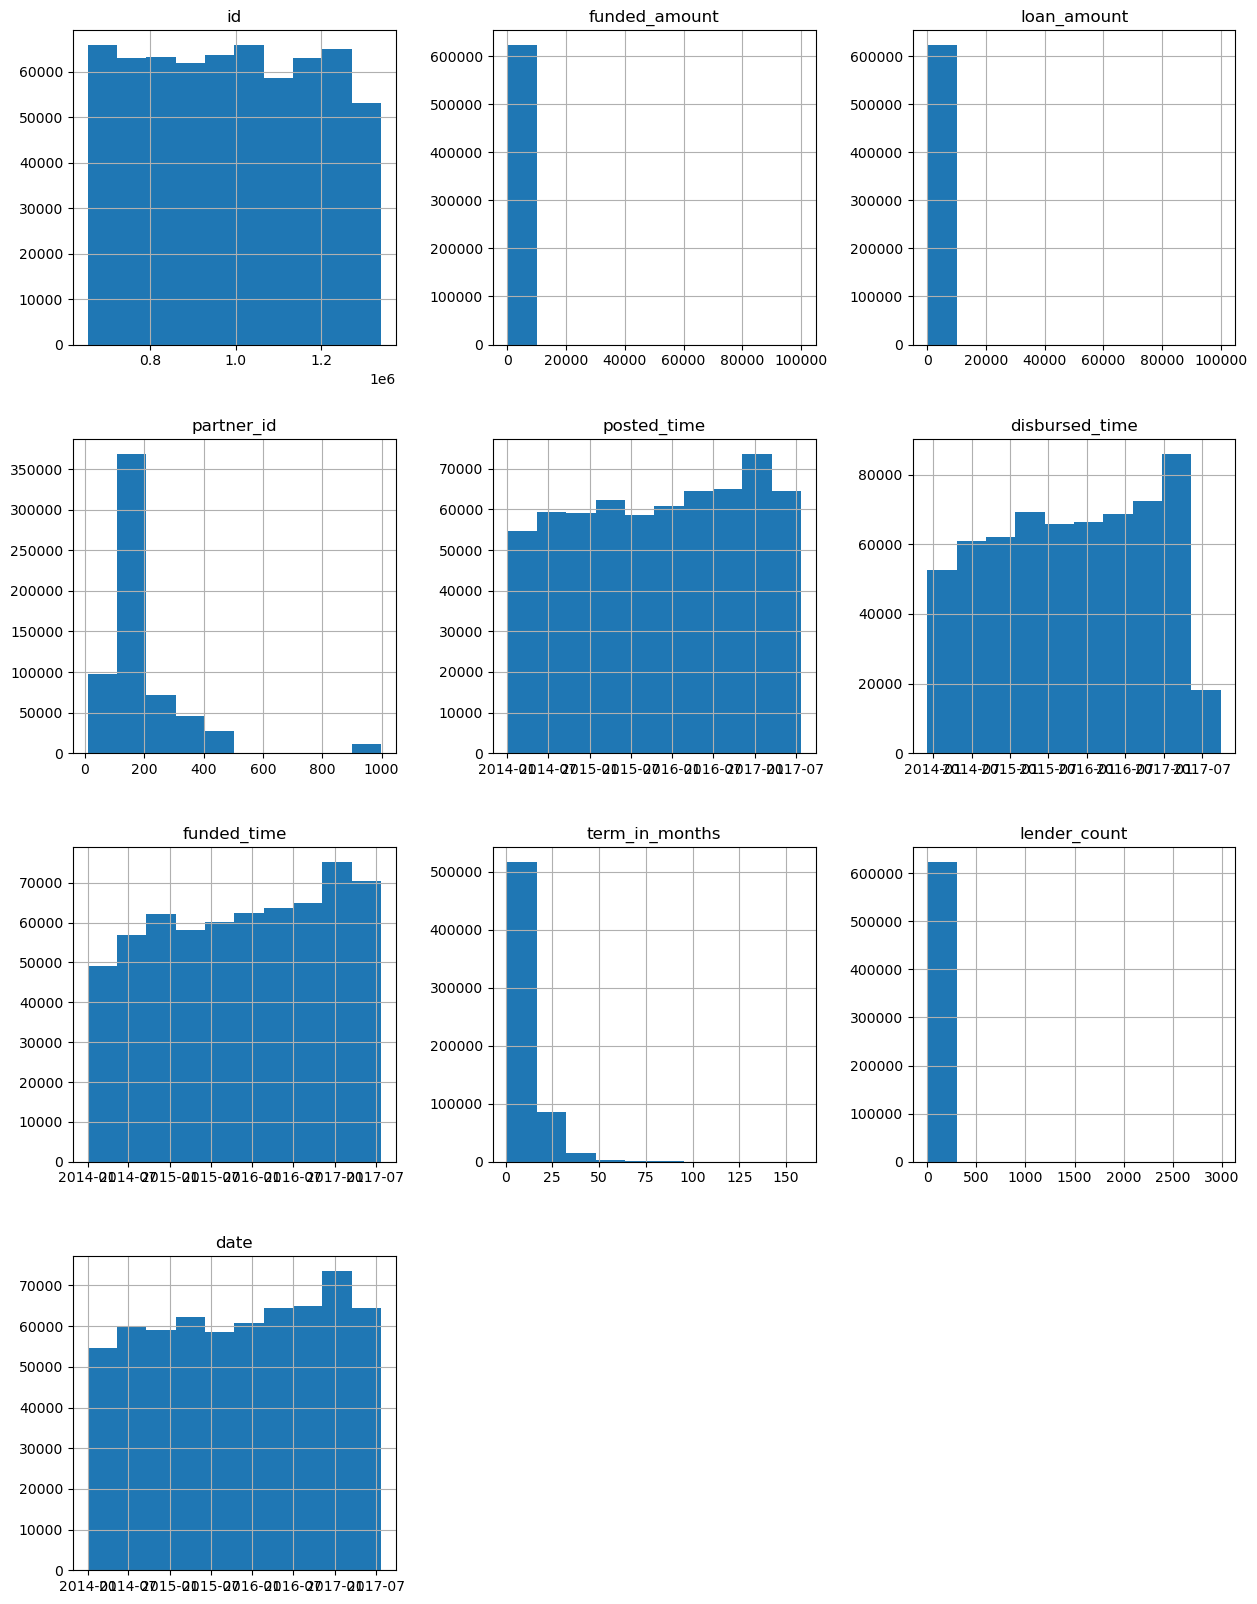

In [11]:
df.hist(figsize=(15, 20));

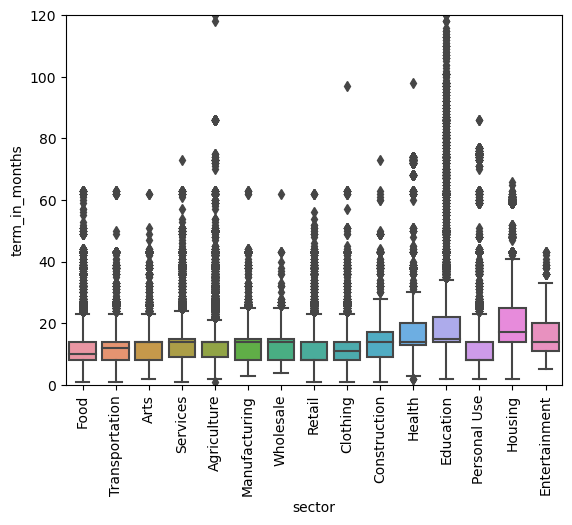

In [12]:
sns.boxplot(x=df['sector'], y=df['term_in_months'])
plt.ylim([0, 120])
plt.xticks(rotation=90)
plt.show()

In [13]:
df_term_in_months = df[df['term_in_months']>50]
print('Количество записей, где term_in_months больше 50 -',df_term_in_months.shape[0])
print('% от общего количества записей',df_term_in_months.shape[0]/df.shape[0])
df = df[df['term_in_months']<=50]

Количество записей, где term_in_months больше 50 - 4387
% от общего количества записей 0.007045884172538237


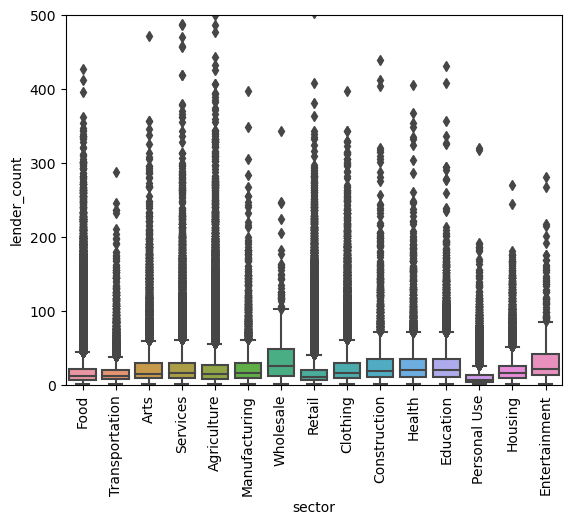

In [14]:
sns.boxplot(x=df['sector'], y=df['lender_count'])
plt.ylim([0, 500])
plt.xticks(rotation=90)
plt.show()

In [15]:
df_lender_count = df[df['lender_count']>150]
print('Количество записей, где lender_count больше 150 -', df_lender_count.shape[0])
print('% от общего количества записей', df_lender_count.shape[0]/df.shape[0])
df = df[df['lender_count']<=150]

Количество записей, где lender_count больше 150 - 3685
% от общего количества записей 0.005960410580901454


В столбцах term_in_months и lender_count есть достаточно большие значения, которые выделяются на общем фоне. При проверке получается, что таких значений (term_in_months>50, lender_count>150) меньше 1%, поэтому можно их отбросить без вреда для анализа. 

<a id='section2'></a>

## 2. Анализ скорости сбора средств

### 2.1. Время, затраченное на сбор средств по каждой заявке

[К содержанию](#section0)

In [16]:
display(df.query('posted_time>funded_time'))
df = df.drop(df.query('posted_time>funded_time').index)

id  funded_amount  loan_amount           activity    sector  \
595842  1281091         2000.0       2000.0  Cleaning Services  Services   

                                                      use country_code  \
595842  me to buy additional cleaning materials and a ...           US   

              country     region currency  ...  posted_time  \
595842  United States  не указан      USD  ...   2017-05-15   

            disbursed_time         funded_time term_in_months  lender_count  \
595842 2017-04-29 00:32:26 2017-04-27 11:52:24             18            39   

                                                     tags borrower_genders  \
595842  #Parent, #Woman Owned Biz, #Biz Durable Asset,...           female   

       repayment_interval       date main_country_religion  
595842            monthly 2017-05-15            Christians  

[1 rows x 21 columns]

В данной записи дата выдачи займа 27 апреля 2017, а дата размещения заявки 15 мая 2017 года. Займ без заявки не мог быть выдан, скорей всего тут ошибка в данных. Поэтому удалим данную строку.

In [17]:
df['fundraising_hours'] = df['funded_time'] - df['posted_time']
display(df.head())

id  funded_amount  loan_amount             activity          sector  \
0  653051          300.0        300.0  Fruits & Vegetables            Food   
1  653053          575.0        575.0             Rickshaw  Transportation   
2  653068          150.0        150.0       Transportation  Transportation   
3  653063          200.0        200.0           Embroidery            Arts   
4  653084          400.0        400.0           Milk Sales            Food   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cycle-van and buy another ...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                           to purchase one buffalo.           PK  Pakistan   

         region currency  ...      disbursed_time         funded_time  \
0        Lahore      PKR  ... 2013-12-17 08:00:00 2014-01-02 10:06:32   
1        Lahore      PKR  ... 2013-12-17 08:00:00 2014-01-02 09:17:23   
2     Maynaguri      INR  ... 2013-12-17 08:00:00 2014-01-01 16:01:36   
3        Lahore      PKR  ... 2013-12-24 08:00:00 2014-01-01 13:00:00   
4  Abdul Hakeem      PKR  ... 2013-12-17 08:00:00 2014-01-01 19:18:51   

  term_in_months lender_count                          tags  borrower_genders  \
0             12           12                           NaN            female   
1             11           14                           NaN    female, female   
2             43            6  user_favorite, user_favorite            female   
3             11            8                           NaN            female   
4             14           16                           NaN            female   

  repayment_interval       date main_country_religion fundraising_hours  
0          irregular 2014-01-01               Muslims   1 days 03:53:53  
1          irregular 2014-01-01               Muslims   1 days 02:26:15  
2             bullet 2014-01-01                Hindus   0 days 06:03:29  
3          irregular 2014-01-01               Muslims   0 days 04:56:49  
4            monthly 2014-01-01               Muslims   0 days 07:25:32  

[5 rows x 22 columns]

In [18]:
df['fundraising_hours'] = df.apply(lambda x:x['fundraising_hours'].total_seconds()/3600 , axis=1)
display(df.head())

id  funded_amount  loan_amount             activity          sector  \
0  653051          300.0        300.0  Fruits & Vegetables            Food   
1  653053          575.0        575.0             Rickshaw  Transportation   
2  653068          150.0        150.0       Transportation  Transportation   
3  653063          200.0        200.0           Embroidery            Arts   
4  653084          400.0        400.0           Milk Sales            Food   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cycle-van and buy another ...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                           to purchase one buffalo.           PK  Pakistan   

         region currency  ...      disbursed_time         funded_time  \
0        Lahore      PKR  ... 2013-12-17 08:00:00 2014-01-02 10:06:32   
1        Lahore      PKR  ... 2013-12-17 08:00:00 2014-01-02 09:17:23   
2     Maynaguri      INR  ... 2013-12-17 08:00:00 2014-01-01 16:01:36   
3        Lahore      PKR  ... 2013-12-24 08:00:00 2014-01-01 13:00:00   
4  Abdul Hakeem      PKR  ... 2013-12-17 08:00:00 2014-01-01 19:18:51   

  term_in_months lender_count                          tags  borrower_genders  \
0             12           12                           NaN            female   
1             11           14                           NaN    female, female   
2             43            6  user_favorite, user_favorite            female   
3             11            8                           NaN            female   
4             14           16                           NaN            female   

  repayment_interval       date main_country_religion fundraising_hours  
0          irregular 2014-01-01               Muslims         27.898056  
1          irregular 2014-01-01               Muslims         26.437500  
2             bullet 2014-01-01                Hindus          6.058056  
3          irregular 2014-01-01               Muslims          4.946944  
4            monthly 2014-01-01               Muslims          7.425556  

[5 rows x 22 columns]

In [19]:
print('Среднее время сбора средств -', df['fundraising_hours'].mean(), 'часов, медиана -', df['fundraising_hours'].median())

Среднее время сбора средств - 349.50091958655315 часов, медиана - 229.09458333333333


<a id='section22'></a>

### 2.2.  Распределение времени сбора средств

[К содержанию](#section0)

In [20]:
dfn = df.drop(columns=['loan_amount', 'currency', 'tags', 'date']) 

Для небольшого облегчения анализа удалим столбцы, кторые нам не нужны. В нашем датасете значения столбца funded_amount равны значениям loan_amount. Поэтому второй удалим.

In [21]:
#используем cut, чтобы разделить на неравные интервалы
cutting = pd.cut(dfn['fundraising_hours'], bins=[0, 12, 24, 48, 120, 240, np.inf], labels=['< 12 hours', '< 24 hours', '1-2 days', '2-5 days', '5-10 days', '10+ days'])

#И строим круговую диаграмму
print('Распределение времени сбора средств по временным категориям')
fig = go.Figure(data=[go.Pie(labels=dfn.pivot_table(index=cutting, values='id', aggfunc='count').index, values=dfn.pivot_table(index=cutting, values='id', aggfunc='count')['id'])])
fig.show()

Распределение времени сбора средств по временным категориям


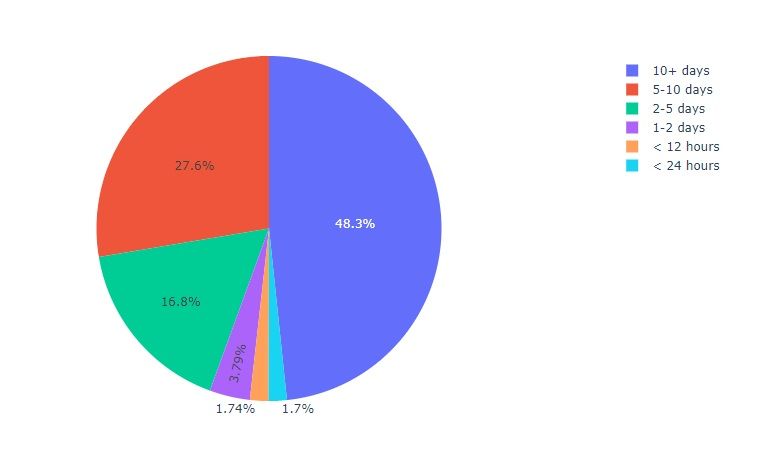

Почти на половину заявок нужно больше 10 дней для сбора средств. 27,6% заявок собирают средства за первые 5-10 дней. За первые сутки собирают лишь 3,42% от общего числа заявок.

<a id='section23'></a>

### 2.3. Факторы, которые могут повлиять на скорость сбора средств

[К содержанию](#section0)

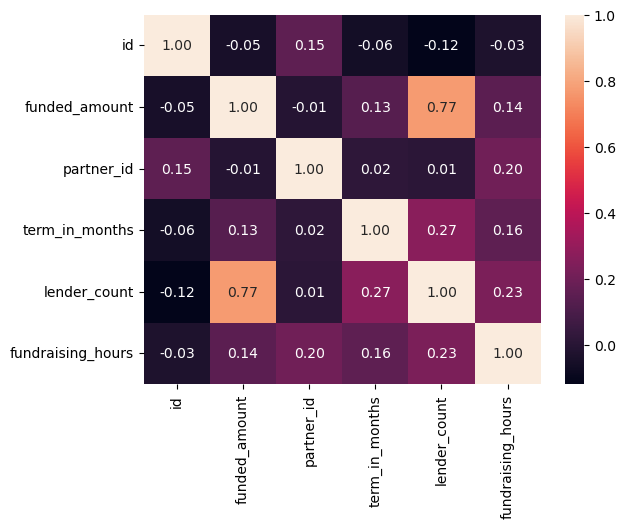

In [22]:
sns.heatmap(dfn.select_dtypes(np.number).corr(), annot=True, fmt='.2f');

<a id='section231'></a>

####  Сумма кредита

[К содержанию](#section0)

In [23]:
print('Коэф. корреляции -', dfn['fundraising_hours'].corr(dfn['funded_amount']))

Коэф. корреляции - 0.14414360823723796


In [24]:
def categ_money(row):
    if row['funded_amount']<=100:
        return '0_100'
    if row['funded_amount']>100 and row['funded_amount']<=500:
        return '100_500'
    if row['funded_amount']>500 and row['funded_amount']<=1000:
        return '500_1000'
    if row['funded_amount']>1000 and row['funded_amount']<=2500:
        return '1000_2500'
    if row['funded_amount']>2500 and row['funded_amount']<=5000:
        return '2500_5000'
    else: 
        return 'more_5000'   
    
dfn['categ_money'] = dfn.apply(categ_money, axis=1)

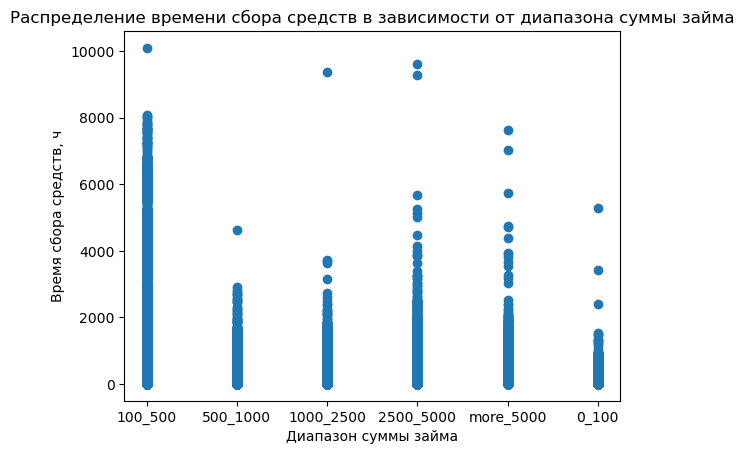

In [25]:
plt.scatter(x=dfn['categ_money'], y=dfn['fundraising_hours'])
plt.title('Распределение времени сбора средств в зависимости от диапазона суммы займа')
plt.xlabel('Диапазон суммы займа')
plt.ylabel('Время сбора средств, ч')
plt.show()

In [26]:
interval_range = pd.interval_range(start=0,
                                   freq=200,
                                   end=10000)

dfn['cut_amount'] = pd.cut(dfn['funded_amount'],
                       bins=interval_range)
df2 = dfn.groupby('cut_amount').agg({'fundraising_hours':'median'}).reset_index()
#display(df2)

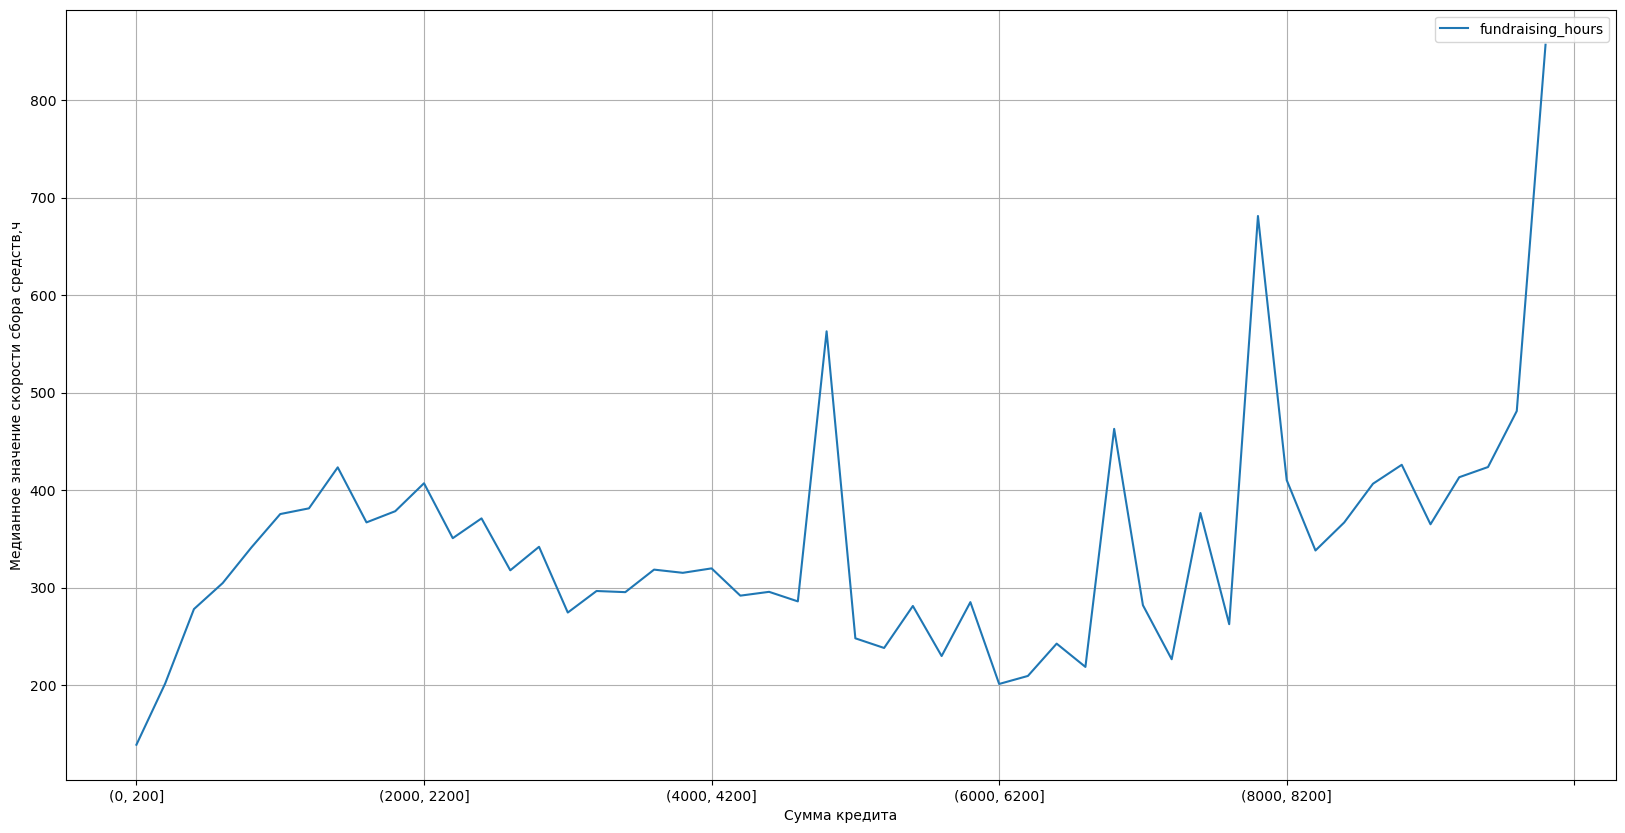

In [27]:
df2.plot(x='cut_amount', y='fundraising_hours', grid=True, figsize=(20, 10));
plt.xlabel ('Сумма кредита')
plt.ylabel ('Медианное значение скорости сбора средств,ч')
plt.show()

Коэф. корреляции между **суммой займа** и скорстью сбора средств всего 15% - взаимосвязь слишком слабая. Если займ до 1300, то еще видна зависимость: чем больше сумма, тем дольше срок сбора средств; но при более высоких суммых кредита прямой связи между этими показателями нет.

Если разбить суммы займов по диапазонам, то быстрей всего собираются совсем маленькие суммы (до 100 долларов).

<a id='section232'></a>

#### Сектор

[К содержанию](#section0)

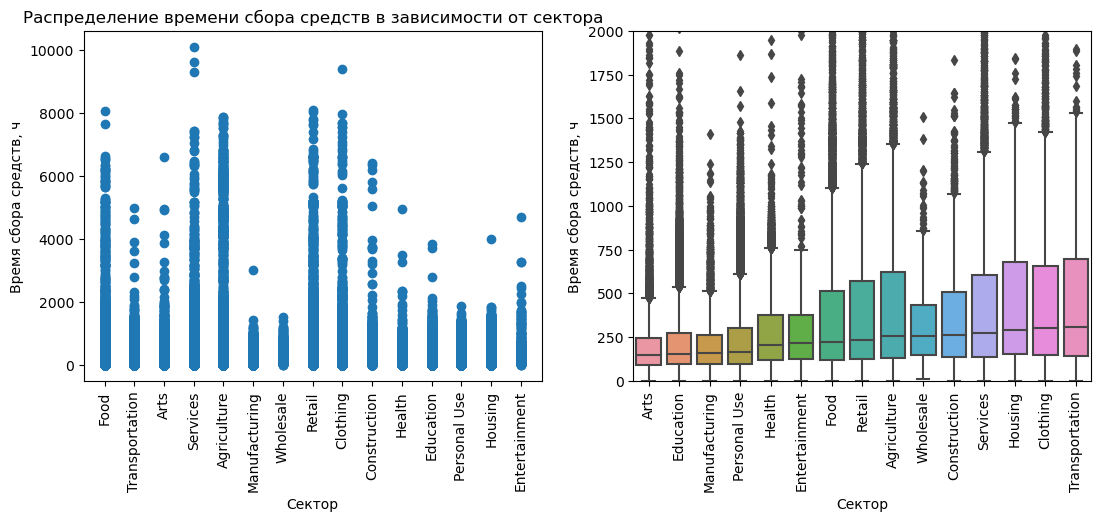

In [28]:
plt.figure(figsize=(13, 10))
plt.subplot(2, 2, 1)
plt.scatter(x=dfn['sector'], y=dfn['fundraising_hours'])
plt.xticks(rotation=90)
plt.title('Распределение времени сбора средств в зависимости от сектора')
plt.xlabel('Сектор')
plt.ylabel('Время сбора средств, ч')
plt.subplot(2, 2, 2)
sns.boxplot(x=dfn['sector'], y=dfn['fundraising_hours'], order=dfn.groupby('sector')['fundraising_hours'].median().sort_values().index)
plt.ylim([0, 2000])
plt.xticks(rotation=90)
plt.xlabel('Сектор')
plt.ylabel('Время сбора средств, ч')
plt.show()

У займов **секторов:** Manufacturing, Wholesale, Personal Use и Housing
меньше всего время, потраченное на сбор средств. Но по медианам - у Personal Use и Manufacturing значения меньше. Значит займы именно этих 2 секторов чаще быстрее собираются.

<a id='section233'></a>

#### Деятельность

[К содержанию](#section0)

In [29]:
df3 = dfn.groupby('activity').agg({'fundraising_hours':'median'}).reset_index()
df3 = df3.sort_values(by='fundraising_hours')
df3 = df3[df3['fundraising_hours']<160]
s_activ = df3['activity'].tolist()
df31 = dfn.query('activity in @s_activ')
df31 = df31.sort_values(by='activity')

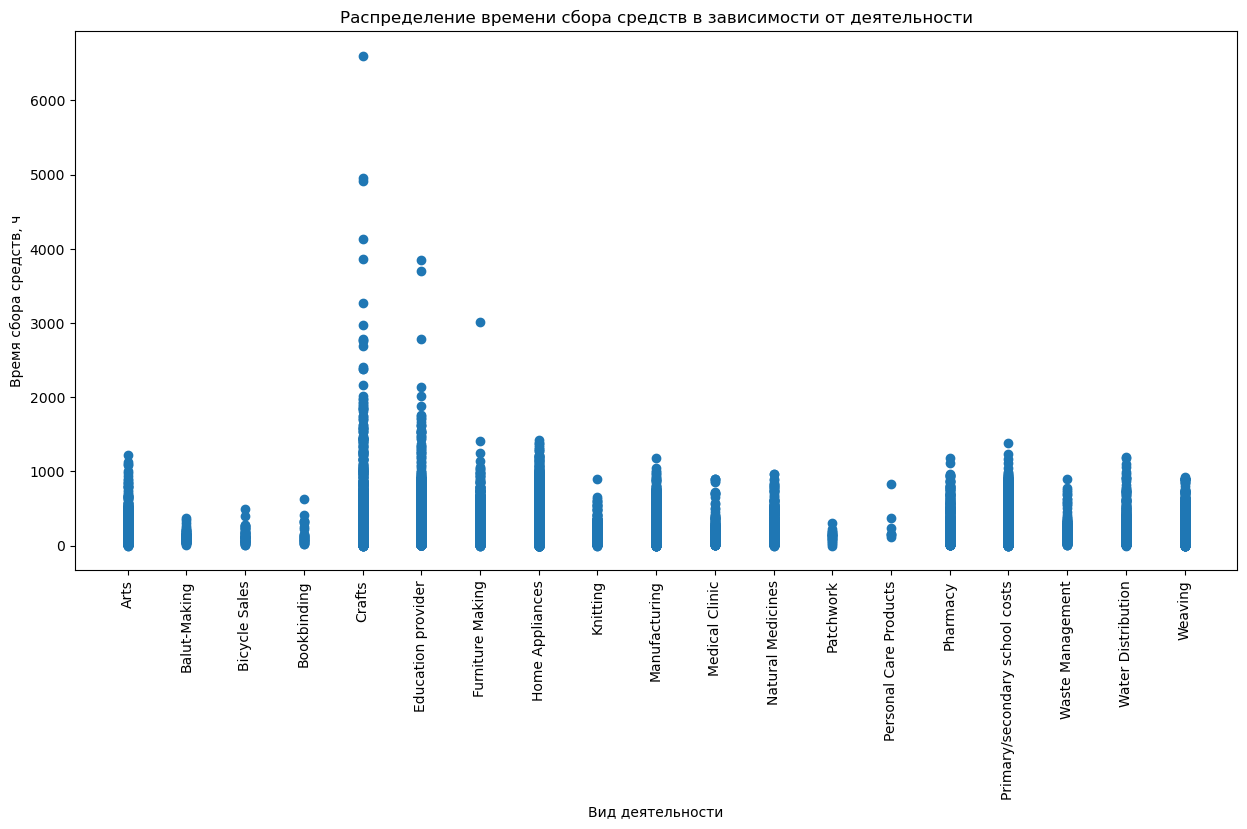

In [30]:
plt.figure(figsize=(15, 7))
plt.scatter(x=df31['activity'], y=df31['fundraising_hours'])
plt.xticks(rotation=90)
plt.title('Распределение времени сбора средств в зависимости от деятельности')
plt.xlabel('Вид деятельности')
plt.ylabel('Время сбора средств, ч')
plt.show()

**Видов деятельности** слишком много, и визуально сложно оценить данные. Сначала отфильтруем виды деятельности с наименьшей медианой по времени возврата. Из полученного списка быстрее всего воззвращаются займы: Patchwork, Balut-Making, Bicycle Sales и Bookbinding.

<a id='section234'></a>

#### Партнер

[К содержанию](#section0)

In [31]:
print('Коэф. корреляции -', dfn['fundraising_hours'].corr(dfn['partner_id']))

Коэф. корреляции - 0.20474539491895952


In [32]:
df_partner = dfn.pivot_table(index='partner_id', values = 'fundraising_hours', aggfunc = ['median', 'count']).reset_index()
df_partner.columns = ['partner_id', 'median', 'count']
df_partner = df_partner.sort_values('median')
df_partner = df_partner.reset_index(drop=True)
print('Медианное значение времени возвратаа средств (в ч) в зависимости от id-партнера')
display(df_partner.head(10))
df_partner = df_partner[df_partner['count']>20]
#df_partner = df_partner[df_partner['median']<120]
print('Медианное значение времени возвратаа средств (в ч) в зависимости от id-партнера (больше 20 займов)')
display(df_partner.head(10))
s_pid = df_partner['partner_id'].tolist()
df4 = dfn.query('partner_id in @s_pid')


Медианное значение времени возвратаа средств (в ч) в зависимости от id-партнера


partner_id     median  count
0         157  12.527500      7
1         230  13.415556      5
2         354  23.713889     14
3         229  26.917222      5
4         336  32.094722      9
5         412  33.803611      3
6         273  49.023611     69
7         437  69.596111      4
8         319  72.545694     14
9         343  75.123333    255

Медианное значение времени возвратаа средств (в ч) в зависимости от id-партнера (больше 20 займов)


partner_id      median  count
6          273   49.023611     69
9          343   75.123333    255
10         257   77.694722     21
11         259   77.806944    256
12         325   79.510833     57
15         439   86.524444    122
17         264   92.900278     27
18         203   95.375278    181
19         447   98.569861     46
20         304  101.151667     63

In [33]:
print(dfn.query('partner_id==157')['country'])
display(dfn.query('country=="Chile"'))

642      Chile
678      Chile
3905     Chile
4033     Chile
11117    Chile
16486    Chile
17044    Chile
Name: country, dtype: object


id  funded_amount               activity  sector  \
642    653693         3900.0                 Bakery    Food   
678    653702         5850.0                 Retail  Retail   
3905   657117         3175.0  Food Production/Sales    Food   
4033   657229         5550.0                 Crafts    Arts   
11117  664557         3275.0                 Retail  Retail   
16486  670143         5825.0                 Retail  Retail   
17044  670258         2750.0                 Retail  Retail   

                                                     use country_code country  \
642                        to buy ingredients and molds.           CL   Chile   
678    to buy supplies, such as sugar, sun-dried peac...           CL   Chile   
3905                to buy supplies, jars, and tableware           CL   Chile   
4033                          to buy tools and supplies.           CL   Chile   
11117  to buy laminate, spiral binding, and bookstore...           CL   Chile   
16486  to buy smoked meat, toilet paper, candy, veget...           CL   Chile   
17044              buy fabric, collars, piqués, buttons.           CL   Chile   

           region  partner_id         posted_time      disbursed_time  \
642        Arauco         157 2014-01-03 12:43:39 2013-12-16 08:00:00   
678        Cañete         157 2014-01-03 13:54:11 2013-12-20 08:00:00   
3905         Lota         157 2014-01-14 13:21:01 2013-12-23 08:00:00   
4033       Cañete         157 2014-01-14 17:46:42 2013-12-19 08:00:00   
11117      Castro         157 2014-01-31 16:22:36 2014-01-21 08:00:00   
16486      Cañete         157 2014-02-14 12:58:52 2014-01-31 08:00:00   
17044  Concepción         157 2014-02-14 19:00:01 2014-02-10 08:00:00   

              funded_time  term_in_months  lender_count  \
642   2014-01-03 18:34:17               5            77   
678   2014-01-04 02:25:50               5           107   
3905  2014-01-14 19:18:38               5            65   
4033  2014-01-15 00:33:39               7            22   
11117 2014-02-06 17:10:36               6            62   
16486 2014-02-18 23:55:34               6           111   
17044 2014-02-17 11:34:15               5            56   

                                        borrower_genders repayment_interval  \
642    female, female, female, female, female, female...          irregular   
678    female, female, female, female, female, female...          irregular   
3905   female, male, female, male, male, female, fema...          irregular   
4033   female, female, female, female, female, female...          irregular   
11117  female, female, female, female, female, male, ...          irregular   
16486  female, female, female, female, female, female...          irregular   
17044  female, female, female, female, female, female...          irregular   

      main_country_religion  fundraising_hours categ_money    cut_amount  
642              Christians           5.843889   2500_5000  (3800, 4000]  
678              Christians          12.527500   more_5000  (5800, 6000]  
3905             Christians           5.960278   2500_5000  (3000, 3200]  
4033             Christians           6.782500   more_5000  (5400, 5600]  
11117            Christians         144.800000   2500_5000  (3200, 3400]  
16486            Christians         106.945000   more_5000  (5800, 6000]  
17044            Christians          64.570556   2500_5000  (2600, 2800]

In [34]:
display(dfn.query('partner_id==230'))

id  funded_amount       activity        sector  \
7631  660866          225.0        Farming   Agriculture   
7769  660892          425.0  General Store        Retail   
7788  660818          525.0     Food Stall          Food   
7822  660793          525.0  General Store        Retail   
7828  660836         1000.0   Construction  Construction   

                                                    use country_code country  \
7631  This borrower will use this money to pay for s...           NP   Nepal   
7769                 to buy goods for the general store           NP   Nepal   
7788                            to expand a food stall.           NP   Nepal   
7822  to pay for stocks of inventory of food items a...           NP   Nepal   
7828  to pay for wood to expand her shuttering business           NP   Nepal   

                               region  partner_id         posted_time  \
7631  Kalaiya, Bara district of Nepal         230 2014-01-23 09:06:58   
7769  Kalaiya, Bara district of Nepal         230 2014-01-23 09:46:12   
7788  Kalaiya, Bara district of Nepal         230 2014-01-23 08:05:16   
7822  Kalaiya, Bara district of Nepal         230 2014-01-23 07:22:24   
7828  Kalaiya, Bara district of Nepal         230 2014-01-23 08:32:59   

          disbursed_time         funded_time  term_in_months  lender_count  \
7631 2014-01-09 08:00:00 2014-02-05 01:29:49              14             9   
7769 2014-01-21 08:00:00 2014-01-23 23:11:08              14            17   
7788 2014-01-21 08:00:00 2014-01-23 18:12:17              14            19   
7822 2014-01-13 08:00:00 2014-01-23 17:30:14              14            21   
7828 2014-01-21 08:00:00 2014-02-05 06:05:49              26            30   

     borrower_genders repayment_interval main_country_religion  \
7631           female            monthly                Hindus   
7769           female            monthly                Hindus   
7788           female            monthly                Hindus   
7822           female            monthly                Hindus   
7828           female            monthly                Hindus   

      fundraising_hours categ_money   cut_amount  
7631         304.380833     100_500   (200, 400]  
7769          13.415556     100_500   (400, 600]  
7788          10.116944    500_1000   (400, 600]  
7822          10.130556    500_1000   (400, 600]  
7828         309.547222    500_1000  (800, 1000]

In [35]:
display(dfn.query('partner_id==354'))

id  funded_amount activity  sector  use country_code country  \
27572  681018         1500.0   Health  Health  NaN           ZM  Zambia   
27676  681008         1500.0   Health  Health  NaN           ZM  Zambia   
27836  681030          800.0   Health  Health  NaN           ZM  Zambia   
28059  681507         1250.0   Health  Health  NaN           GH   Ghana   
28417  681504         1000.0   Health  Health  NaN           GH   Ghana   
30979  684348          800.0   Health  Health  NaN           ZM  Zambia   
31005  684344          800.0   Health  Health  NaN           ZM  Zambia   
31031  684340         1000.0   Health  Health  NaN           GH   Ghana   
31126  684351          800.0   Health  Health  NaN           ZM  Zambia   
31136  684349          800.0   Health  Health  NaN           ZM  Zambia   
31140  684347          800.0   Health  Health  NaN           ZM  Zambia   
31288  684343          800.0   Health  Health  NaN           ZM  Zambia   
31325  684341         1000.0   Health  Health  NaN           GH   Ghana   
31465  684353          800.0   Health  Health  NaN           ZM  Zambia   

          region  partner_id         posted_time      disbursed_time  \
27572  не указан         354 2014-03-10 04:07:41 2014-04-01 07:00:00   
27676  не указан         354 2014-03-10 03:34:09 2014-04-01 07:00:00   
27836  не указан         354 2014-03-10 04:59:13 2014-04-01 07:00:00   
28059  не указан         354 2014-03-11 03:47:08 2014-04-01 07:00:00   
28417  не указан         354 2014-03-11 03:44:54 2014-04-01 07:00:00   
30979  не указан         354 2014-03-17 03:15:02 2014-04-01 07:00:00   
31005  не указан         354 2014-03-17 03:10:31 2014-04-01 07:00:00   
31031  не указан         354 2014-03-17 03:01:56 2014-04-01 07:00:00   
31126  не указан         354 2014-03-17 03:21:52 2014-04-01 07:00:00   
31136  не указан         354 2014-03-17 03:18:05 2014-04-01 07:00:00   
31140  не указан         354 2014-03-17 03:13:04 2014-04-01 07:00:00   
31288  не указан         354 2014-03-17 03:08:29 2014-04-01 07:00:00   
31325  не указан         354 2014-03-17 03:04:58 2014-04-01 07:00:00   
31465  не указан         354 2014-03-17 03:23:37 2014-04-01 07:00:00   

              funded_time  term_in_months  lender_count borrower_genders  \
27572 2014-03-10 20:11:30              14            55        не указан   
27676 2014-03-27 15:01:11              14            57        не указан   
27836 2014-03-10 20:53:24              14            28        не указан   
28059 2014-03-12 13:26:30              14            45        не указан   
28417 2014-03-12 12:15:19              14            40        не указан   
30979 2014-03-18 02:32:27              14            30        не указан   
31005 2014-03-18 03:06:42              14            30        не указан   
31031 2014-03-17 14:44:56              14            38        не указан   
31126 2014-03-18 03:08:38              14            31        не указан   
31136 2014-03-18 03:52:58              14            31        не указан   
31140 2014-03-18 02:51:58              14            28        не указан   
31288 2014-03-17 11:11:06              14            32        не указан   
31325 2014-03-17 12:31:07              14            38        не указан   
31465 2014-03-21 23:12:27              14            29        не указан   

      repayment_interval main_country_religion  fundraising_hours categ_money  \
27572            monthly            Christians          16.063611   1000_2500   
27676            monthly            Christians         419.450556   1000_2500   
27836            monthly            Christians          15.903056    500_1000   
28059            monthly            Christians          33.656111   1000_2500   
28417            monthly            Christians          32.506944    500_1000   
30979            monthly            Christians          23.290278    500_1000   
31005            monthly            Christians          23.936389    500_1000   
31031          

**Партнеров** слишком много для визуального анализа данных. Если рассматривать по медиане выдачи средств, то ниже всего этот показатель у партнеров с id: 157, 230 и 354. У них медиана сбора средств меньше суток, а количество выданных займов очень маленькое. Партнер 157 - единственный партнер в Чили; 230 выдает средства в Непале, а 354 выдает в Замбии и Гане, но только сектор Здоровье.

Если рассматривать тех партнеров, которые выдали хотя бы больше 20 займов, то самая низкое медианное значение будет уже чуть больше 2 суток, у партнера с id 273; у сотальных уже больше 3 суток. 

<a id='section235'></a>

#### Страна

[К содержанию](#section0)

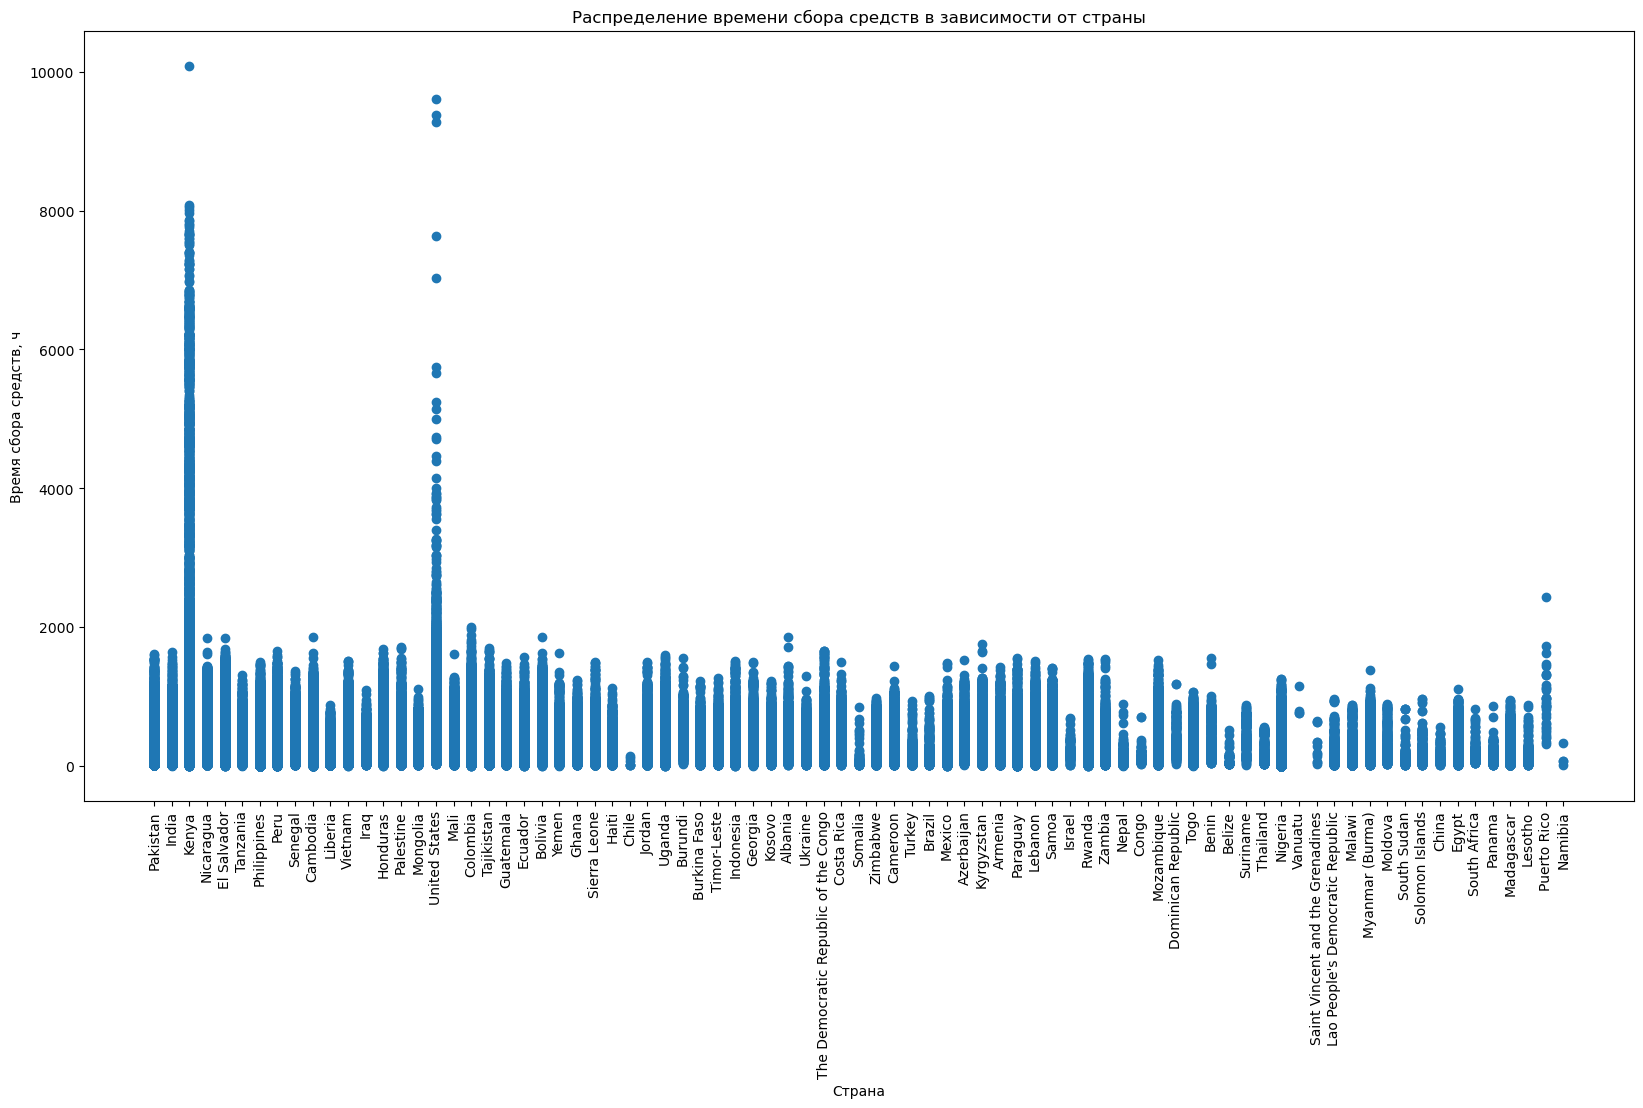

In [36]:
plt.figure(figsize=(20, 10))
plt.scatter(x=dfn['country'], y=dfn['fundraising_hours']);
plt.xticks(rotation=90)
plt.title('Распределение времени сбора средств в зависимости от страны')
plt.xlabel('Страна')
plt.ylabel('Время сбора средств, ч')
plt.show()

In [37]:
df5 = dfn.groupby('country').agg({'id':'count'}).reset_index()
df5 = df5.sort_values(by='id')
display(df5.head(10))

country   id
45                           Namibia    4
76                           Vanuatu    4
11                             Chile    7
57  Saint Vincent and the Grenadines   12
55                       Puerto Rico   36
62                           Somalia   57
3                             Belize   69
14                             Congo   73
28                            Israel  124
12                             China  125

In [38]:
del_country = ['Vanuatu', 'Chile', 'Namibia', 'Saint Vincent and the Grenadines','Kenya','United States']
df6 = dfn.query('country not in @del_country')

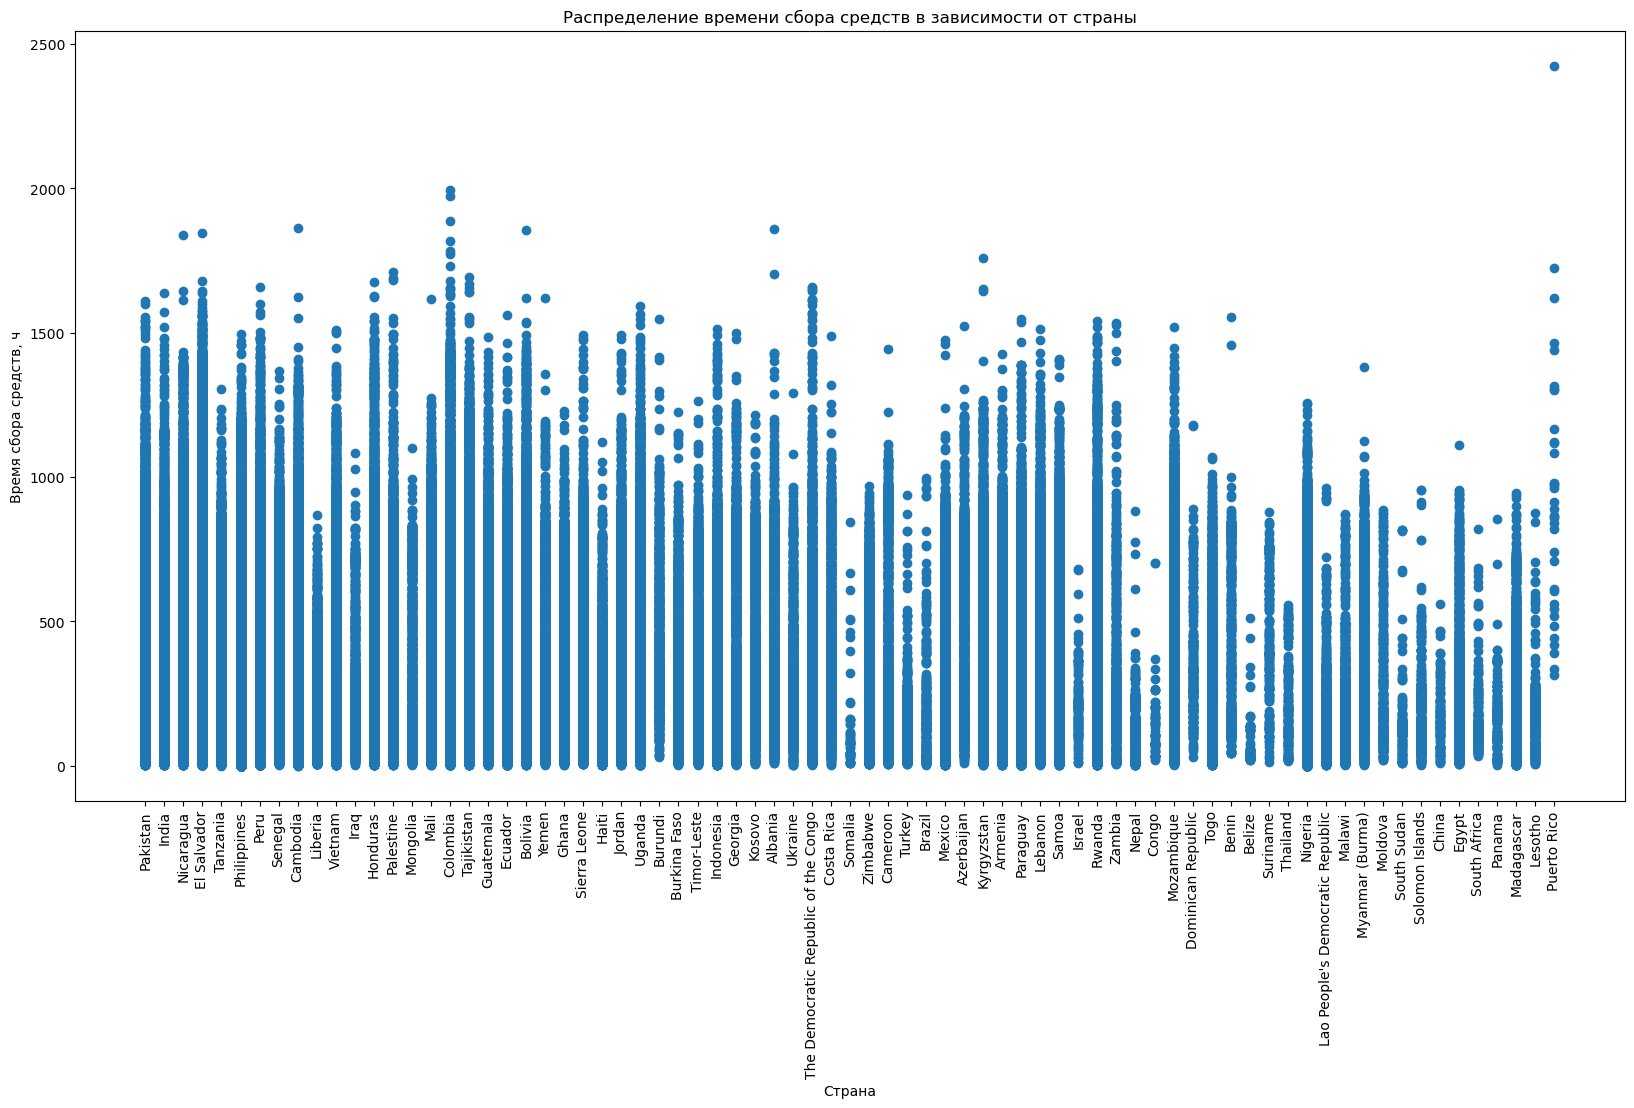

In [39]:
plt.figure(figsize=(20, 10))
plt.scatter(x=df6['country'], y=df6['fundraising_hours']);
plt.xticks(rotation=90)
plt.title('Распределение времени сбора средств в зависимости от страны')
plt.xlabel('Страна')
plt.ylabel('Время сбора средств, ч')
plt.show()

In [40]:
l_country = ['Spmalia', 'Nepal', 'Congo', 'Turkey', 'Brazil', 'Israel', 'Belize', 'China', 'South Africa', 'South Sudan']
df7 = dfn.query('country in @l_country')

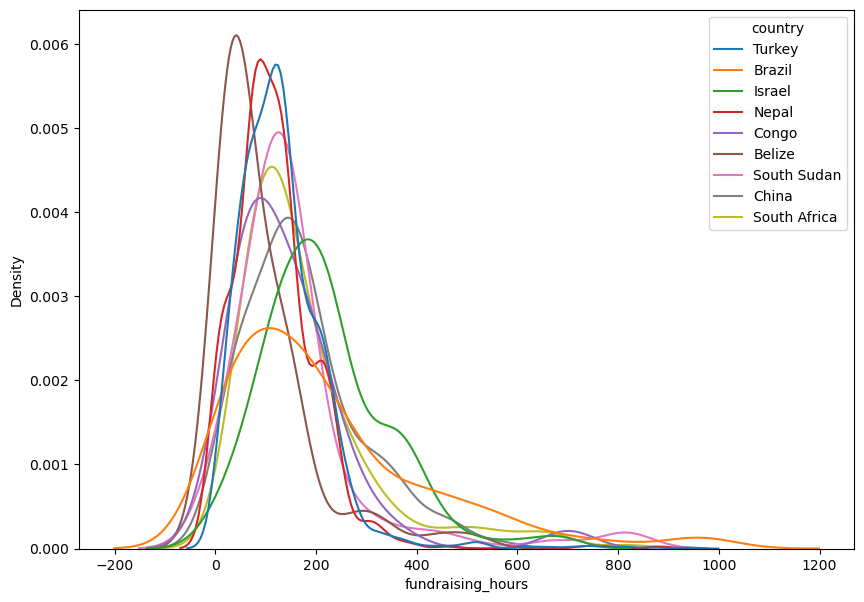

In [41]:
plt.figure(figsize=(10, 7))
sns.kdeplot(data=df7, hue='country', x='fundraising_hours', common_norm=False)
plt.show()

В разрезе **по странам** - на первый взгляд быстрей всего собирают на займы из Чили, а дольше на займы из Кении и США. Но в Чили выдано всего 7 займов. Если убрать страны в которых выдано слишком мало займов (Vanuatu-4, Chile-7, Namibia-8, Saint Vincent and the Grenadines -16), то легче выявить страны, в которых быстрее возвращаются займы. Самыми быстрые возвраты в Белизе, Турции и Непале. 

<a id='section3'></a>

## 3. Анализ заявок в зависимости от индекса бедности страны

### 3.1. Аггрегация данных по заявкам в разрезе стран

[К содержанию](#section0)

In [42]:
#группируем заявки по странам
df_country = dfn.groupby('country').agg({'id':'count',
                                        'funded_amount':'sum',
                                        'partner_id':'nunique',
                                        'term_in_months':'mean',
                                        'lender_count':'mean'})
df_country = df_country.reset_index()
display(df_country)

country    id  funded_amount  partner_id  term_in_months  lender_count
0      Albania  1703      2226775.0           1       23.177921     44.277158
1      Armenia  6580      9311050.0           2       26.333739     41.503799
2   Azerbaijan  1635      2383850.0           3       16.397554     45.675229
3       Belize    69        34625.0           1       24.014493     18.840580
4        Benin   489       444625.0           2       10.533742     27.094070
..         ...   ...            ...         ...             ...           ...
76     Vanuatu     4         9250.0           1       37.000000     85.000000
77     Vietnam  9829     12295950.0           7       17.661919     37.694882
78       Yemen  2145      1596325.0           1       17.678322     20.411189
79      Zambia   708       954650.0           6       17.337571     44.120056
80    Zimbabwe  3964      3288250.0           5        9.493441     24.941726

[81 rows x 6 columns]

In [43]:
display(df_country.sort_values(by='id', ascending = False))

country      id  funded_amount  partner_id  \
54                       Philippines  156719     53190350.0           9   
30                             Kenya   69568     28305150.0          29   
9                           Cambodia   33001     17203400.0          11   
19                       El Salvador   32722     20135475.0           5   
49                          Pakistan   24917     11758450.0           4   
..                               ...     ...            ...         ...   
55                       Puerto Rico      36       160325.0           1   
57  Saint Vincent and the Grenadines      12        33325.0           1   
11                             Chile       7        30325.0           1   
45                           Namibia       4        13975.0           1   
76                           Vanuatu       4         9250.0           1   

    term_in_months  lender_count  
54        9.506799      8.554840  
30       12.103668     13.107391  
9        13.031393     15.816824  
19       15.120683     18.793564  
49       13.518361     14.429827  
..             ...           ...  
55       25.166667     75.250000  
57       33.250000    107.083333  
11        5.571429     71.428571  
45        7.000000    128.500000  
76       37.000000     85.000000  

[81 rows x 6 columns]

Больше всего займов было выдано в Филиппинах (156 719), на втором месте - Кения (69 568). Меньше всего (4 займа) в Намбии и  Вануату.

In [44]:
display(df_country.sort_values(by='funded_amount', ascending = False))

country      id  funded_amount  partner_id  \
54                       Philippines  156719     53190350.0           9   
53                              Peru   21421     28668925.0          13   
52                          Paraguay   11494     28627975.0           1   
30                             Kenya   69568     28305150.0          29   
19                       El Salvador   32722     20135475.0           5   
..                               ...     ...            ...         ...   
3                             Belize      69        34625.0           1   
57  Saint Vincent and the Grenadines      12        33325.0           1   
11                             Chile       7        30325.0           1   
45                           Namibia       4        13975.0           1   
76                           Vanuatu       4         9250.0           1   

    term_in_months  lender_count  
54        9.506799      8.554840  
53        9.450072     23.115074  
52        9.998434     29.431094  
30       12.103668     13.107391  
19       15.120683     18.793564  
..             ...           ...  
3        24.014493     18.840580  
57       33.250000    107.083333  
11        5.571429     71.428571  
45        7.000000    128.500000  
76       37.000000     85.000000  

[81 rows x 6 columns]

По сумме выданных средств так же лидирует Филиппины, а меньше всего - Намбия и Вануату.

In [45]:
display(df_country.sort_values(by='partner_id', ascending = False))

country     id  funded_amount  partner_id  \
30                             Kenya  69568     28305150.0          29   
53                              Peru  21421     28668925.0          13   
40                            Mexico   5253      7843475.0          12   
9                           Cambodia  33001     17203400.0          11   
47                         Nicaragua  10407      8711675.0          11   
..                               ...    ...            ...         ...   
11                             Chile      7        30325.0           1   
57  Saint Vincent and the Grenadines     12        33325.0           1   
58                             Samoa   6653      4968425.0           1   
61                   Solomon Islands    531       487575.0           1   
0                            Albania   1703      2226775.0           1   

    term_in_months  lender_count  
30       12.103668     13.107391  
53        9.450072     23.115074  
40       11.936988     31.675424  
9        13.031393     15.816824  
47       14.053041     24.259921  
..             ...           ...  
11        5.571429     71.428571  
57       33.250000    107.083333  
58       13.889674     22.707801  
61       13.075330     32.941620  
0        23.177921     44.277158  

[81 rows x 6 columns]

Больше всего партнеров по кредитованию (29) в Кении.

<a id='section32'></a>

### 3.2. Анализ взаимосвязи между темой заявки (sector) и индексом бедности страны

[К содержанию](#section0)

In [46]:
#таблица с индексами бедности стран
df_mpi_index = pd.DataFrame(list(mpi_index. items ()), columns = ['country', 'mpi_index'])
display(df_mpi_index)

country  mpi_index
0            Afghanistan   0.271721
1                Albania   0.002748
2                Algeria   0.005409
3                 Angola   0.282435
4              Argentina   0.001469
..                   ...        ...
114                Sudan   0.279440
115  Trinidad and Tobago   0.002418
116              Vanuatu   0.129000
117              Ukraine   0.000840
118                Yemen   0.245166

[119 rows x 2 columns]

In [47]:
#полная табдлица с добавлением индексов бедности стран
dfni = dfn.merge(df_mpi_index, how='left', on='country')
display(dfni.head())

id  funded_amount             activity          sector  \
0  653051          300.0  Fruits & Vegetables            Food   
1  653053          575.0             Rickshaw  Transportation   
2  653068          150.0       Transportation  Transportation   
3  653063          200.0           Embroidery            Arts   
4  653084          400.0           Milk Sales            Food   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cycle-van and buy another ...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                           to purchase one buffalo.           PK  Pakistan   

         region  partner_id         posted_time  ...         funded_time  \
0        Lahore         247 2014-01-01 06:12:39  ... 2014-01-02 10:06:32   
1        Lahore         247 2014-01-01 06:51:08  ... 2014-01-02 09:17:23   
2     Maynaguri         334 2014-01-01 09:58:07  ... 2014-01-01 16:01:36   
3        Lahore         247 2014-01-01 08:03:11  ... 2014-01-01 13:00:00   
4  Abdul Hakeem         245 2014-01-01 11:53:19  ... 2014-01-01 19:18:51   

  term_in_months  lender_count  borrower_genders repayment_interval  \
0             12            12            female          irregular   
1             11            14    female, female          irregular   
2             43             6            female             bullet   
3             11             8            female          irregular   
4             14            16            female            monthly   

  main_country_religion fundraising_hours  categ_money  cut_amount mpi_index  
0               Muslims         27.898056      100_500  (200, 400]  0.198247  
1               Muslims         26.437500     500_1000  (400, 600]  0.198247  
2                Hindus          6.058056      100_500    (0, 200]  0.068811  
3               Muslims          4.946944      100_500    (0, 200]  0.198247  
4               Muslims          7.425556      100_500  (200, 400]  0.198247  

[5 rows x 21 columns]

In [48]:
dfni['mpi_index'] = dfni['mpi_index'].fillna(-1)

In [49]:
dfni.query('mpi_index == -1')['country'].unique()

array(['United States', 'Kosovo', 'Israel',
       'Saint Vincent and the Grenadines', 'Solomon Islands',
       'Puerto Rico'], dtype=object)

In [50]:
dfni_non = dfni[dfni['mpi_index']==-1]
print('Количество записей, где индекс бедности неизвестен -', dfni_non.shape[0])
print('% от общего количества записей', dfni_non.shape[0]/dfni.shape[0])
dfni = dfni[dfni['mpi_index']>-1]

Количество записей, где индекс бедности неизвестен - 4991
% от общего количества записей 0.00812125748502994


У части стран индекс бедности неизвестен, т.к. эти страны в целом не относятся к бедным. Таких записей меньше процента, поэтому для удобства анализа уберем их из датасета.

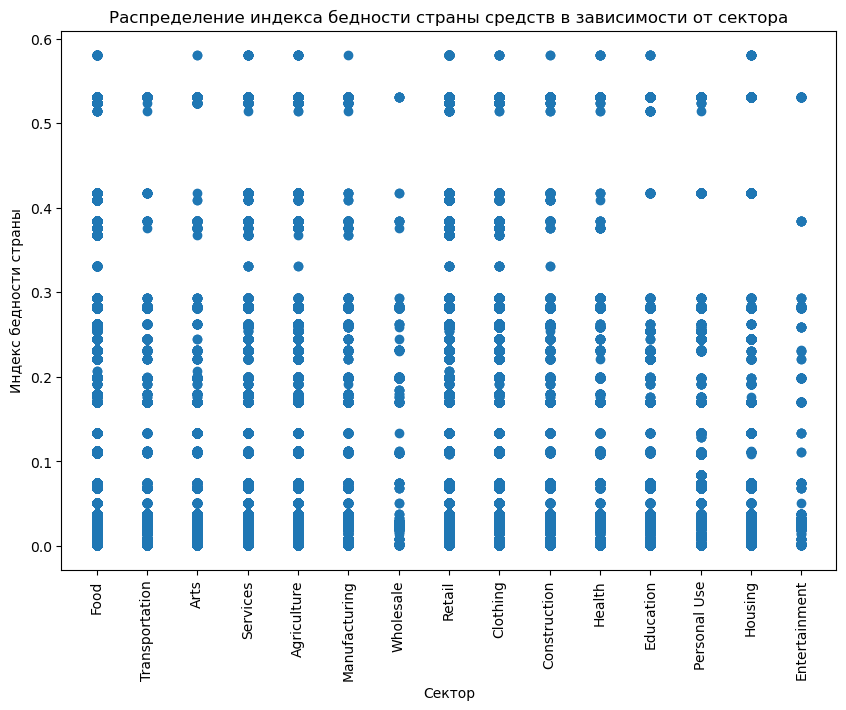

In [51]:
plt.figure(figsize=(10, 7))
plt.scatter(x=dfni['sector'], y=dfni['mpi_index'])
plt.xticks(rotation=90)
plt.title('Распределение индекса бедности страны средств в зависимости от сектора')
plt.xlabel('Сектор')
plt.ylabel('Индекс бедности страны')
plt.show()

Из графика видно, что в богатых странах выдаются займы всех секторов.

In [52]:
df51 = dfni.groupby('sector').agg({'mpi_index':['mean','median','count']}).reset_index()
df51.columns = ['sector','mean_mpi', 'median_mpi','count']
#df51 = df51.sort_values(by='mean_mpi')
display(df51)

sector  mean_mpi  median_mpi   count
0      Agriculture  0.098494    0.032463  164568
1             Arts  0.092340    0.032463   11340
2         Clothing  0.132179    0.109942   29083
3     Construction  0.115276    0.037754    5737
4        Education  0.119718    0.029006   28241
5    Entertainment  0.089093    0.024601     611
6             Food  0.102119    0.029221  126664
7           Health  0.085205    0.029006    8071
8          Housing  0.076226    0.029006   28338
9    Manufacturing  0.096528    0.032463    6066
10    Personal Use  0.149830    0.170348   34331
11          Retail  0.088816    0.024249  112789
12        Services  0.114104    0.037754   39533
13  Transportation  0.100878    0.029221   13618
14       Wholesale  0.136230    0.170776     579

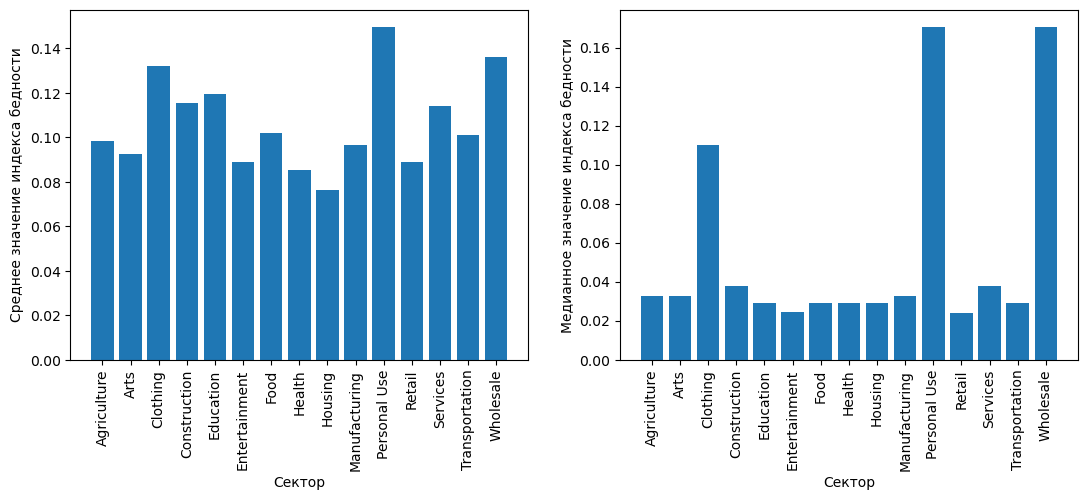

In [53]:
plt.figure(figsize=(13, 10))
plt.subplot(2, 2, 1)
plt.bar(x=df51['sector'], height=df51['mean_mpi'])
plt.xticks(rotation=90)
#plt.title('Распределение времени сбора средств в зависимости от страны')
plt.xlabel('Сектор')
plt.ylabel('Среднее значение индекса бедности')
plt.subplot(2, 2, 2)
plt.bar(x=df51['sector'], height=df51['median_mpi'])
plt.xticks(rotation=90)
plt.xlabel('Сектор')
plt.ylabel('Медианное значение индекса бедности')
plt.show()

Выведя среднее и медианное значение индекса бедости в разрезе по секторам видно: 

    - Займы секторов Entertainment и Retail в основном выдаются в более богатых странах
    - В наиболее бедных странах чаще берут займы секторов: Personal Use, Wholesale, Clothing.

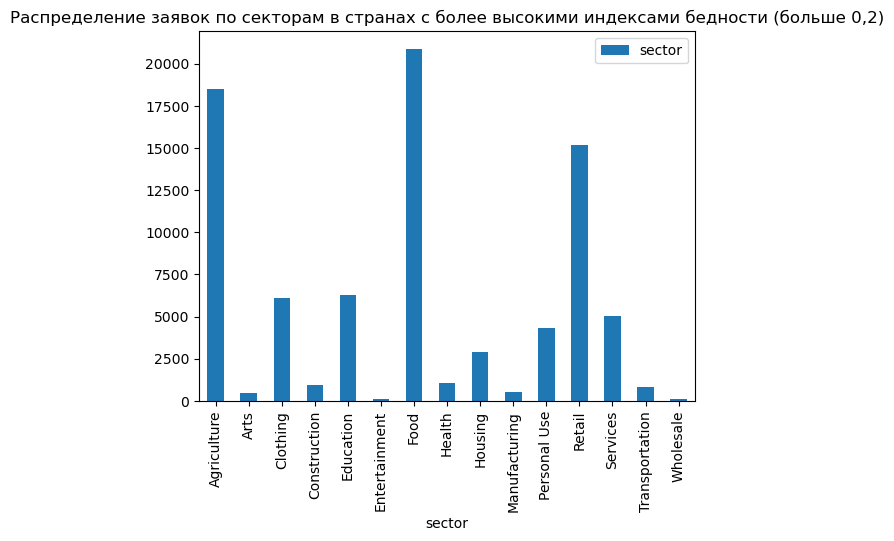

In [54]:
df52 = dfni.query('mpi_index >0.2')
df53 = df52.groupby(['sector']).agg({'sector':'count'})
df53.plot(kind='bar', title='Распределение заявок по секторам в странах с более высокими индексами бедности (больше 0,2)');

Для анализа отберем страны с более высоким индексом бедности (больше 0,2). Среди них наиболее популярны следующие сектора займов: Food, Agriculture, Retail. Меньше всего займов из секторов Entertainment и Wholesale.

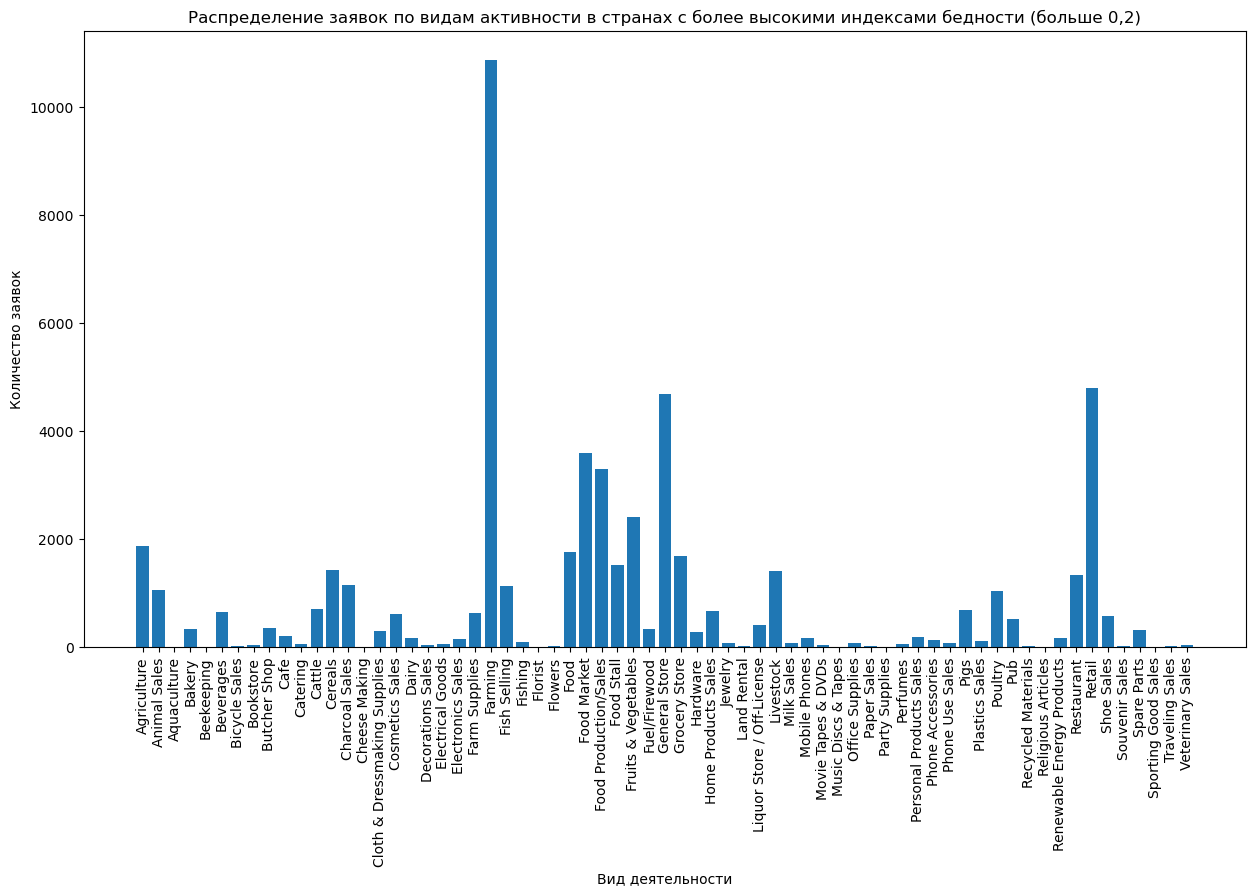

In [55]:
h_sect = ['Food', 'Agriculture', 'Retail']
df54 = df52.query('sector in @h_sect')
df54 = df54.groupby(['activity']).agg({'id':'count'}).reset_index()
plt.figure(figsize=(15, 8))
plt.bar(x=df54['activity'],height=df54['id'])
plt.xticks(rotation=90)
plt.title('Распределение заявок по видам активности в странах с более высокими индексами бедности (больше 0,2)')
plt.xlabel('Вид деятельности')
plt.ylabel('Количество заявок')
plt.show()

In [56]:
df55 = df52.groupby(['activity']).agg({'id':'count'}).reset_index()
display(df55.sort_values(by='id', ascending=False))

activity     id
54                          Farming  10863
129                          Retail   4795
69                    General Store   4686
119  Primary/secondary school costs   3732
61                      Food Market   3596
..                              ...    ...
23                     Celebrations      1
86                     Machine Shop      1
55                             Film      1
52                   Event Planning      1
0                        Adult Care      1

[159 rows x 2 columns]

Самые популярные виды деятельности (в популярных секторах для страны с более высоким индексом бедности - больше 0,2): Farming - больше 10 000 заявок, Retail - 4870 и General Store - 4727.

<a id='section33'></a>

### 3.3. Частота выдачи кредитов по странам

[К содержанию](#section0)

In [57]:
df56 = df52.groupby('country').agg({'id':'count'}).reset_index()
display(df56.sort_values(by='id'))

country     id
4          Chile      7
16       Somalia     57
5          Congo     73
17   South Sudan    159
0          Benin    489
22        Zambia    708
2        Burundi    762
9         Malawi   1291
3       Cameroon   2079
21         Yemen   2145
1   Burkina Faso   2391
19   Timor-Leste   2457
14       Senegal   2929
11    Mozambique   3114
7        Liberia   3593
8     Madagascar   3781
18      Tanzania   4863
15  Sierra Leone   5017
13        Rwanda   5793
10          Mali   6105
6        Lebanon   8077
12       Nigeria   9136
20        Uganda  18206

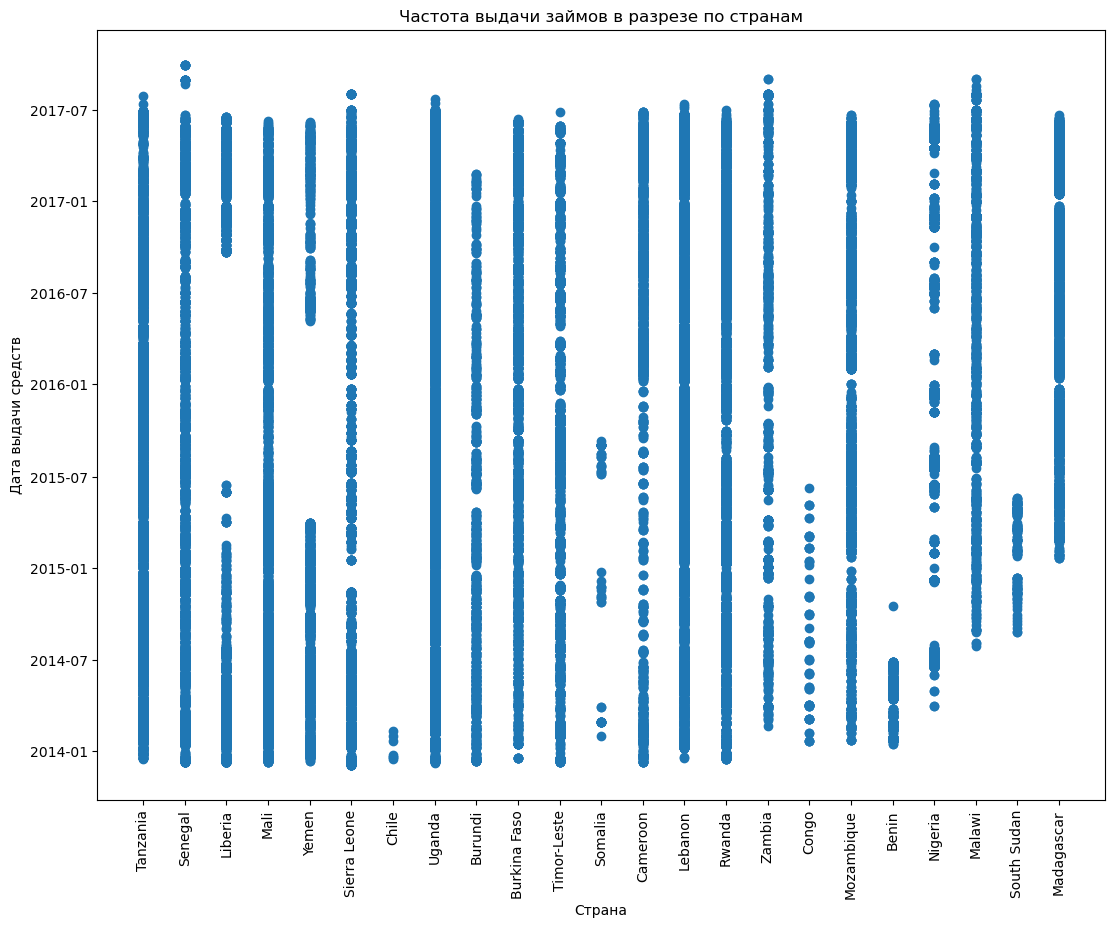

In [58]:
plt.figure(figsize=(13, 10))
plt.scatter(x=df52['country'], y=df52['disbursed_time'])
plt.xticks(rotation=90)
plt.title('Частота выдачи займов в разрезе по странам')
plt.xlabel('Страна')
plt.ylabel('Дата выдачи средств')
plt.show()

Перечень наиболее бедных стран, в которых Kiva недопредставлена, на основе количества займов и частоты их выдачи:

- Chili выдано всего 7 займов в 2014 году
- Somlia маленькое количество займов и их нерегулярность
- Congo	с июля 2015 нет выданных займов
- South Sudan с июля 2015 нет выданных займов
- Benin	с 2015 нет выданных займов


<a id='section4'></a>

## 4. Распределение женщин-заемщиков в разных странах и религиях

[К содержанию](#section0)

In [59]:
dfgen = dfn.copy()

In [60]:
df_nogen = dfgen.query('borrower_genders=="не указан"')
display(df_nogen['main_country_religion'].value_counts())
print('Доля заявок, в которых не указан пол заемщика -', df_nogen.shape[0]/dfn.shape[0])

Christians        2896
Muslims            279
Hindus              41
Buddhists           31
Jews                 6
Folk Religions       2
Name: main_country_religion, dtype: int64

Доля заявок, в которых не указан пол заемщика - 0.005296472272845613


У части заявок не был указан пол заемщика. Но от общего числа заявок это всего пол процента, поэтому не будем обращать на это внимание. 

In [61]:
dfgen['male'] = dfgen['borrower_genders'].str.count('male')-dfgen['borrower_genders'].str.count('female')
dfgen['female'] = dfgen['borrower_genders'].str.count('female')
dfgen['all_borr'] = dfgen['male']+dfgen['female']
dfgen['share_femail'] = dfgen['female']/dfgen['all_borr']
print('Доля женщин-заемщиц от общего числа заемщиков -',dfgen['female'].sum()/dfgen['all_borr'].sum())

Доля женщин-заемщиц от общего числа заемщиков - 0.8115897417424891


In [62]:
dfgen1 = dfgen.pivot_table(index='main_country_religion', values=['male','female'], aggfunc='sum').reset_index()
display(dfgen1)

main_country_religion  female    male
0             Buddhists   86290   25772
1            Christians  697201  172502
2        Folk Religions   22635    1333
3                Hindus   25624     242
4                  Jews     112       6
5               Muslims  159451   30201
6          Unaffiliated      39      86

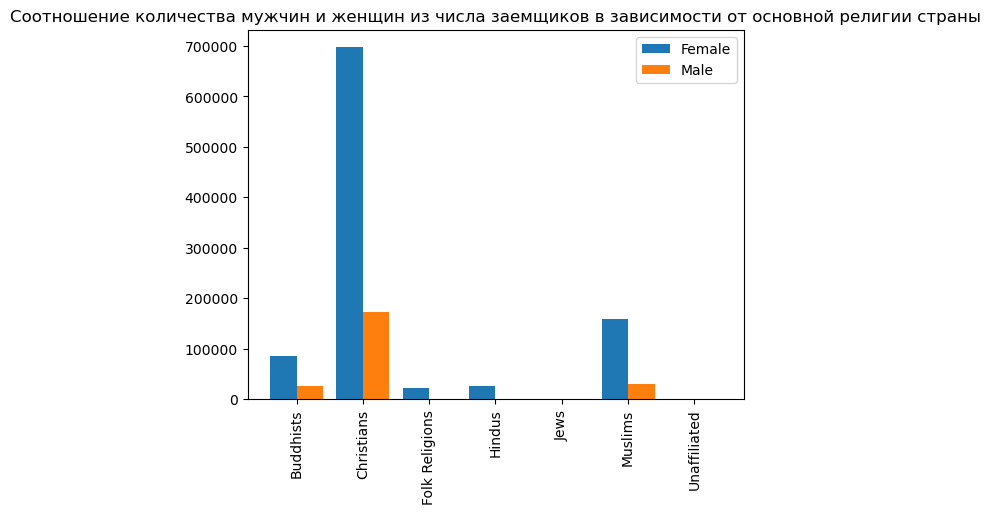

In [63]:
religion = dfgen1['main_country_religion']
x_axis = np.arange(len(religion))
plt.bar(x=x_axis -0.2, height=dfgen1['female'], width=0.4, label = 'Female')
plt.bar(x=x_axis +0.2, height=dfgen1['male'], width=0.4, label = 'Male')
plt.xticks(x_axis, religion, rotation=90)
plt.legend()
plt.title('Соотношение количества мужчин и женщин из числа заемщиков в зависимости от основной религии страны')
plt.show()

main_country_religion  share_femail
0             Buddhists      0.800612
1            Christians      0.783324
2        Folk Religions      0.935157
3                Hindus      0.982567
4                  Jews      0.949153
5               Muslims      0.782581
6          Unaffiliated      0.312000

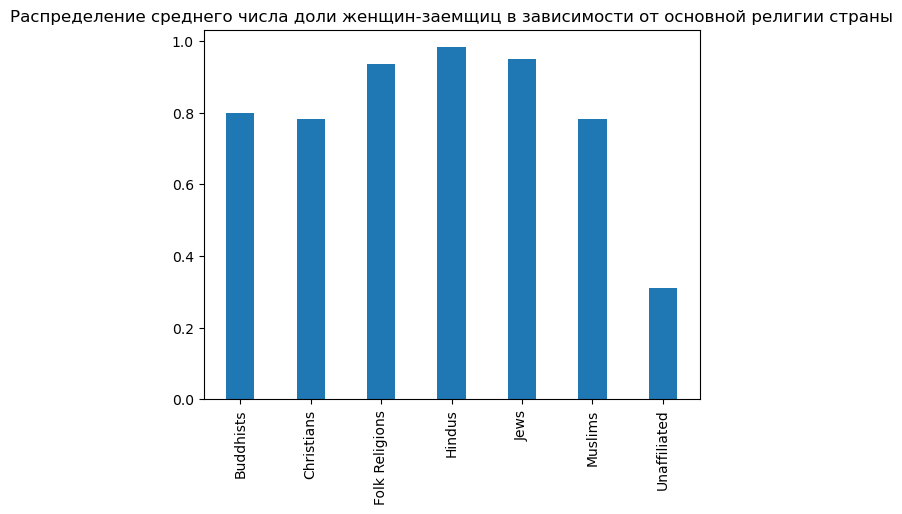

In [64]:
dfgen2 = dfgen.groupby('main_country_religion').agg({'share_femail':'mean'}).reset_index()
display(dfgen2)
plt.bar(x=x_axis, height=dfgen2['share_femail'], width=0.4)
plt.xticks(x_axis, religion, rotation=90)
plt.title('Распределение среднего числа доли женщин-заемщиц в зависимости от основной религии страны')
plt.show()

Женщин-заемщиц значительно больше, чем мужчин. Их доля от общего числа заемщиков - 81%. Если сравнивать количество женщин в зависимости от основной религии страны, то 98% женщин-заемщиц в странах с Индуизмом, 95,88% - в еврейских странах, 93,53% - в странах с народной религией. Меньше всего доля женщин-заемщиц (31%) в нерелигиозных странах. 

<a id='section5'></a>

## 5. Партнёрские отношения Kiva в регионах

[К содержанию](#section0)

In [65]:
def group(row):
    if row['disbursed_time'] < row['funded_time']:
        return 'group1'
    else:
        return 'group2'

In [66]:
df_partn = dfn.copy()
df_partn['group'] = df_partn.apply(group, axis=1)

In [67]:
df_partn_group = df_partn.groupby('group').agg({'id':'count'})#.reset_index()
display(df_partn_group)
k = df_partn_group.loc['group1','id']/(df_partn_group.loc['group1','id']+df_partn_group.loc['group2','id'])
print('Доля кредитов, которые были выданы до полного финансирования', k)

id
group         
group1  587292
group2   27268

Доля кредитов, которые были выданы до полного финансирования 0.9556300442593074


In [68]:
df_partn_country = df_partn.pivot_table(index=['country','partner_id'], values='id', aggfunc='count')
display(df_partn_country)

id
country    partner_id      
Albania    239         1703
Armenia    146         2980
           169         3600
Azerbaijan 30           448
           56          1070
...                     ...
Zimbabwe   184          323
           299           20
           305         2405
           367         1048
           433          168

[328 rows x 1 columns]

In [69]:
df_partn_country = df_partn_country.reset_index()
df_partn_country2 = df_partn_country.pivot_table(index='country', values='partner_id', aggfunc='count').reset_index()
df_partn_country2 = df_partn_country2.sort_values(by='partner_id', ascending=False)
display(df_partn_country2.head(20))

country  partner_id
30          Kenya          29
53           Peru          13
40         Mexico          12
9        Cambodia          11
47      Nicaragua          11
21          Ghana          10
73         Uganda          10
26      Indonesia          10
54    Philippines           9
25          India           9
75  United States           8
24       Honduras           7
56         Rwanda           7
67       Tanzania           7
5         Bolivia           7
77        Vietnam           7
22      Guatemala           7
13       Colombia           6
79         Zambia           6
23          Haiti           5

In [70]:
print('Количество стран, где всего 1 партнер')
display(df_partn_country2[df_partn_country2['partner_id']==1].count())

Количество стран, где всего 1 партнер


country       26
partner_id    26
dtype: int64

In [71]:
df_partn_country3 = df_partn_country2.groupby('partner_id').agg({'country':'count'}).reset_index()
df_partn_country3.columns = ['count_partner_id','count_country']
display(df_partn_country3)

count_partner_id  count_country
0                  1             26
1                  2             13
2                  3              9
3                  4              7
4                  5              7
5                  6              2
6                  7              6
7                  8              1
8                  9              2
9                 10              3
10                11              2
11                12              1
12                13              1
13                29              1

In [72]:
def count_group(count_partner_id):
    if count_partner_id == 1:
        return '1'
    if count_partner_id == 2:
        return '2'
    if count_partner_id >2 and count_partner_id<=5:
        return '3-5'
    if count_partner_id >5 and count_partner_id<=9:
        return '6-9'
    if count_partner_id >9 and count_partner_id<=15:
        return '10-13'
    else:
        return '30'

In [73]:
df_partn_country3['count_par_group'] = df_partn_country3['count_partner_id'].apply(count_group)
df_partn_country4 = df_partn_country3.groupby('count_par_group').agg({'count_country':'sum'}).reset_index()
df_partn_country4.columns = ['Кол-во_партнеров', 'Кол-во_стран']
display(df_partn_country4)

Кол-во_партнеров  Кол-во_стран
0                1            26
1            10-13             7
2                2            13
3              3-5            23
4               30             1
5              6-9            11

In [74]:
print('% соотношение стран с разным числом партнеров')
fig = px.pie(df_partn_country4, values='Кол-во_стран', names='Кол-во_партнеров')
fig.show()

% соотношение стран с разным числом партнеров


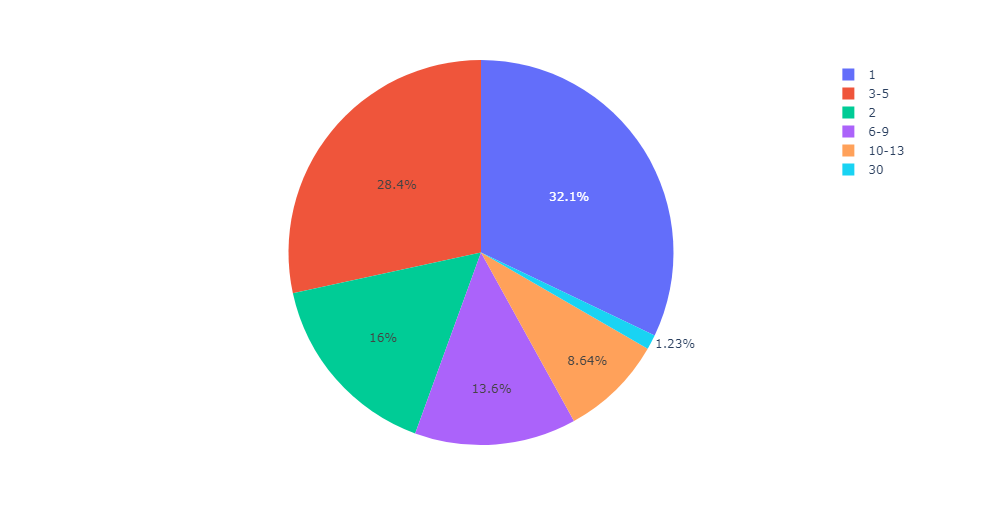

Почти все партнеры (95%) доверяют площадке Kiva и выдают кредиты до полного финансирования. Больше всего партнеров в Кении - 30.
Почти у 30% стран всего 1 партнер и у почти такого же количества стран 3-5 партеров. Получется у 76% стран до 10 партнеров. 

<a id='section6'></a>

## 6. Вывод

[К содержанию](#section0)

При предобработке данных была отброшена часть записей (меньше 1%) из-за аномальных значений в столбцах term_in_months и lender_count и запись, где дата выдачи займа раньше даты размещения заявки.


Для каждого займа было расчитано время сбора средств в часах с момента размещения заявки. 
Среднее время для всего датасета - 350.25 часов (14,5 дней), медиана - 229.68 часов (9,5 дней).
За первые сутки собирают лишь 3,42% от общего числа заявок.27,6% заявок собирают средства за первые 5-10 дней. Почти на половину заявок нужно больше 10 дней для сбора средств. 

Был проведен анализ влияния следующих характеристик на скорость сбора средств:
 - сумма займа никак не влияет, только самые маленькие суммы (до 100) собираются быстрее всего;
 - есть сектора, котрые почти всегда быстро закрывают займы - это Personal Use и Manufacturing;
 - среди видов деятельности с высокой скоростью возврата средств можно выделить Patchwork, Balut-Making, Bicycle Sales и Bookbinding;
 - есть партнеры, медианное значение скорости сбора средств которых меньше суток, но у таких парнеров (id 157, 230 и 354) обычно слишком мало выданных займов. Если отфильтровывать данные по партнерам, которые выдали хотя бы больше 20 займов, то самая низкое медианное значение будет уже чуть больше 2 суток(id 273), у сотальных уже больше 3 суток;
 - в разрезе по странам - на первый взгляд быстрей всего собирают на займы из Чили, а дольше на займы из Кении и США. Но в Чили выдано всего 7 займов. Если убрать страны в которых выдано слишком мало займов (Vanuatu-4, Chile-7, Namibia-8, Saint Vincent and the Grenadines -16), то самые быстрые сборы средств в Белизе, Турции и Непале.

При анализе зависимости сектора заявки от индекса бедности страны было выявлено, что в богатых странах выдаются займы всех секторов, при этом Entertainment и Retail займы в основном выдаются в более богатых странах. В наиболее бедных странах чаще берут займы секторов: Personal Use, Wholesale, Clothing.

Но у стран с более высоким индексом бедности (больше 0,2) более популярны следующие сектора займов: Food, Agriculture, Retail. Меньше всего займов из секторов Entertainment и Wholesale.

Самые популярные виды деятельности (в популярных секторах для страны с более высоким индексом бедности - больше 0,2): Farming - больше 10 000 заявок, Retail - 4870 и General Store - 4727.

На основе количества займов и частоты их выдачи были выявлены следующие наиболее бедные страны, в которых Kiva недопредставлена:
- Chili выдано всего 7 займов в 2014 году
- Somlia маленькое количество займов и их нерегулярность
- Congo с июля 2015 нет выданных займов
- South Sudan с июля 2015 нет выданных займов
- Benin с 2015 нет выданных займов

В представленной базе данных более 80% заемщиков - женщины. Если сравнивать количество женщин в зависимости от основной религии страны, то только в нерелигиозных странах  женщин-заемщиц меньшинство (31%). Самая высокая доля женщин-заемщиц 98% в странах с основной религией -Индуизм. 95,88% - в еврейских странах, 93,53% - в странах с народной религией. 

Почти все партнеры (95%) доверяют площадке Kiva и выдают кредиты до полного финансирования заявки. Больше всего партнеров в Кении - 30. Почти у 30% стран всего 1 партнер, что является недостаточным. 